# Dependencies

In [1]:
! apt install -y texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-cantarell fonts-comfortaa fonts-croscore
  fonts-crosextra-caladea fonts-crosextra-carlito fonts-dejavu-core fonts-dejavu-extra
  fonts-droid-fallback fonts-ebgaramond fonts-ebgaramond-extra fonts-font-awesome
  fonts-freefont-otf fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go fonts-junicode fonts-lato
  fonts-linuxlibertine fonts-lmodern fonts-lobster fonts-lobstertwo fonts-noto-color-emoji
  fonts-noto-core fonts-noto-mono fonts-oflb-asana-math fonts-open-sans fonts-roboto-unhinted
  fonts-sil-charis fonts-sil-gentium fonts-sil-gentium-basic fonts-sil-gentiumplus
  fonts-sil-gentiumplus-compact fonts-stix fonts-texgyre fo

In [2]:
!pip install mauve-text
!pip install torch transformers
!pip install matplotlib-venn
!pip install tqdm
!pip install latex
!pip install matplotlib
!pip install pylatex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 25.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7588 sha256=7193c40c116c4a7f3f656eebcbf0773122bbfd81aa892161139361f1b3395f35
  Stored in directory: /root/.cache/pip/wheels/7e/02/25/c00dfc203e8ba53dfc2e4e97d40e537263d6e03606681f3872
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7227 sha256=2bac488581e6e72c917cac8d0d7e88408e33b9b579349106d6689103142cf76d
  Stored in directory: /root/.cache/pip/wheels/d0/e8/fa/e253c256048ea58d99a8abb5e751abb6a838af6f12887b5418
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2763 sha256=470a10ec8b7cc5da43a857fdd1187cc858e096a7b0019c875745693bfcdc5c52
  Stored in directory: /root/.cache/pip/wheels/75/1f/1c/0ecab7ceabad0b8e018891505911e82a6f35

# Mount Google Drive

In [3]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [4]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/F3/
%ls

/content/drive/.shortcut-targets-by-id/1-q8PQLnrlI1K9omfwKeaKGhV2ToETrvd/Xgen/FakeNewsDetection/DevData/Ai-Gen - Completed Data/Experiment Data/Full_Dataset/5. F3_Dataset
 AlignScore-large.ckpt                      F3_Dataset_visualization_plot
 AlignScore-large.ckpt.1                   'F3_Experiment Data'/
 DeBerta_v3NLI.ckpt                         F3_Human_Dataset.csv
'Experiment Data'/                          F3_Llama_2.csv
 F3_Consistency.csv                         F3_Llama_2_NER.csv
 F3_Dataset_PaLM2.csv                       F3_Llama_2_NER_DICT.csv
 F3_Dataset_Sanity.csv                      llama2_backup/
 F3_Dataset_Updated_AlignScore.csv          llama2_backup2/
 F3_Dataset_Updated.csv                     textbisson_backup/
 F3_Dataset_Updated_Semantic_Distance.csv   textbisson_backup2/
 F3_Dataset_Updated_Sentiment.csv           Untitled0.ipynb


# Import Experiment Data

In [9]:
F3_PaLM= pd.read_csv("F3_Dataset_PaLM2.csv", encoding ='utf-8')
F3_PaLM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43272 entries, 0 to 43271
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uuid                         43272 non-null  object 
 1   human_written_content        43272 non-null  object 
 2   content                      43272 non-null  object 
 3   model                        43272 non-null  object 
 4   num_completion_token         43272 non-null  int64  
 5   num_original_token           43272 non-null  int64  
 6   num_prompt_token             43272 non-null  int64  
 7   num_iagenerated_token        43272 non-null  int64  
 8   original_label               43272 non-null  object 
 9   source_type                  43272 non-null  object 
 10  ai_generated_label           43272 non-null  object 
 11  article_type                 43272 non-null  object 
 12  pre_post_GPT                 43272 non-null  object 
 13  dataset_source  

In [10]:
F3_Llama1= pd.read_csv("llama2_backup/progress.csv", encoding ='utf-8')
F3_Llama2= pd.read_csv("llama2_backup2/progress.csv", encoding ='utf-8')

In [11]:
F3_Llama = pd.concat([F3_Llama1,F3_Llama2],axis =0, ignore_index =True )
F3_Llama.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43272 entries, 0 to 43271
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UUID               43272 non-null  object
 1   Llama2-Entailment  43272 non-null  object
dtypes: object(2)
memory usage: 676.2+ KB


In [12]:
F3_Llama.rename(columns={'UUID':'uuid'}, inplace=True)
F3_Llama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43272 entries, 0 to 43271
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   uuid               43272 non-null  object
 1   Llama2-Entailment  43272 non-null  object
dtypes: object(2)
memory usage: 676.2+ KB


In [13]:
F3_Llama.head(1)

,uuid,Llama2-Entailment
0,4ac69fef-1574-4a5e-8e85-dccdf2b56f69,Entailment.\n\nThe statement by Blake Masters ...


In [14]:
def NLI_label(x):
    if any(term in x for term in ["Not Entailment", "No Entailment", "Non Entailment", "Not Entailment.", "No Entailment.", "Non Entailment."]):
        return "not-entailment"
    elif any(term in x for term in ["Entailment", "Entailment."]):
        return "entailment"
    else:
        return "other"

In [15]:
# Apply the function to classify all rows in the 'Llama2-Entailment' column
F3_Llama['Llama_NLI'] = F3_Llama['Llama2-Entailment'].apply(NLI_label)

In [16]:
F3_Llama.Llama_NLI.value_counts()

not-entailment    24057
entailment        17932
other              1283
Name: Llama_NLI, dtype: int64

In [17]:
F3_Llama_2 = pd.concat([F3_PaLM, F3_Llama], axis=1)
F3_Llama_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43272 entries, 0 to 43271
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uuid                         43272 non-null  object 
 1   human_written_content        43272 non-null  object 
 2   content                      43272 non-null  object 
 3   model                        43272 non-null  object 
 4   num_completion_token         43272 non-null  int64  
 5   num_original_token           43272 non-null  int64  
 6   num_prompt_token             43272 non-null  int64  
 7   num_iagenerated_token        43272 non-null  int64  
 8   original_label               43272 non-null  object 
 9   source_type                  43272 non-null  object 
 10  ai_generated_label           43272 non-null  object 
 11  article_type                 43272 non-null  object 
 12  pre_post_GPT                 43272 non-null  object 
 13  dataset_source  

In [18]:
# Extracting the required columns and describing them
description = F3_Llama_2[['num_prompt_token', 'num_completion_token', 'num_original_token']].describe()

# Transpose for a more readable table format
description = description.transpose()

print(description)

                        count        mean         std   min    25%    50%  \
num_prompt_token      43272.0  405.937974  378.576432  97.0  184.0  217.0   
num_completion_token  43272.0  178.941186  141.316384   5.0   83.0  138.0   
num_original_token    43272.0  256.562488  335.654452   7.0   57.0   84.0   

                        75%     max  
num_prompt_token      549.0  2874.0  
num_completion_token  254.0  2514.0  
num_original_token    391.0  1985.0  


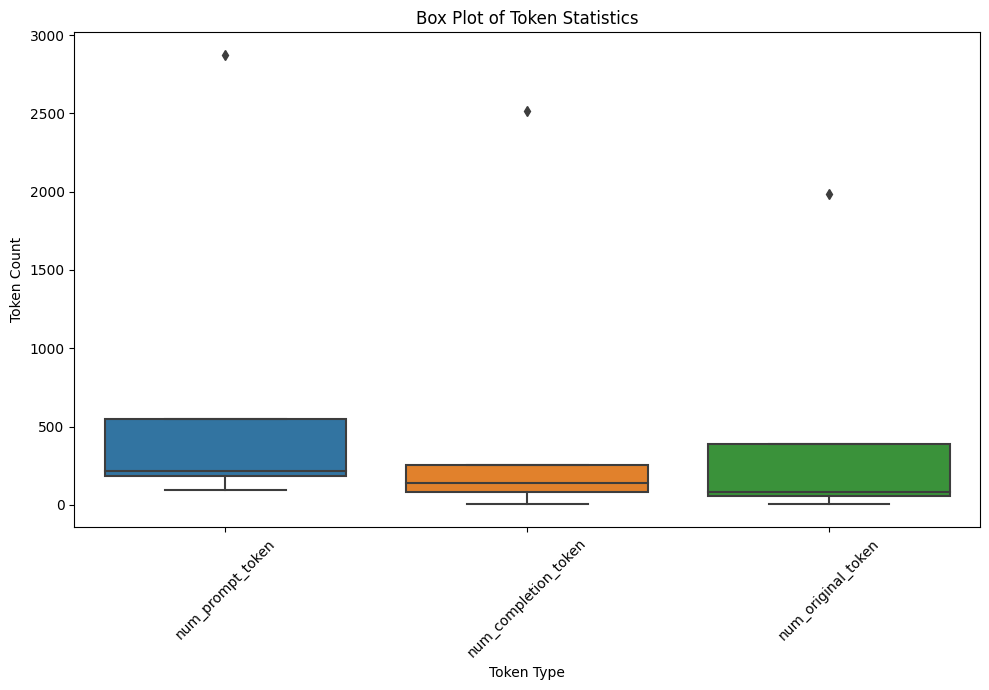

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data (from your provided statistics)
data = {
    'count': [43272.0, 43272.0, 43272.0],
    'mean': [405.937974, 178.941186, 256.562488],
    'std': [378.576432, 141.316384, 335.654452],
    'min': [97.0, 5.0, 7.0],
    '25%': [184.0, 83.0, 57.0],
    '50%': [217.0, 138.0, 84.0],
    '75%': [549.0, 254.0, 391.0],
    'max': [2874.0, 2514.0, 1985.0]
}

df = pd.DataFrame(data, index=['num_prompt_token', 'num_completion_token', 'num_original_token'])

# Prepare data for boxplot
melted_df = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['min', '25%', '50%', '75%', 'max'])

# Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(x='index', y='value', data=melted_df)
plt.title('Box Plot of Token Statistics')
plt.ylabel('Token Count')
plt.xlabel('Token Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


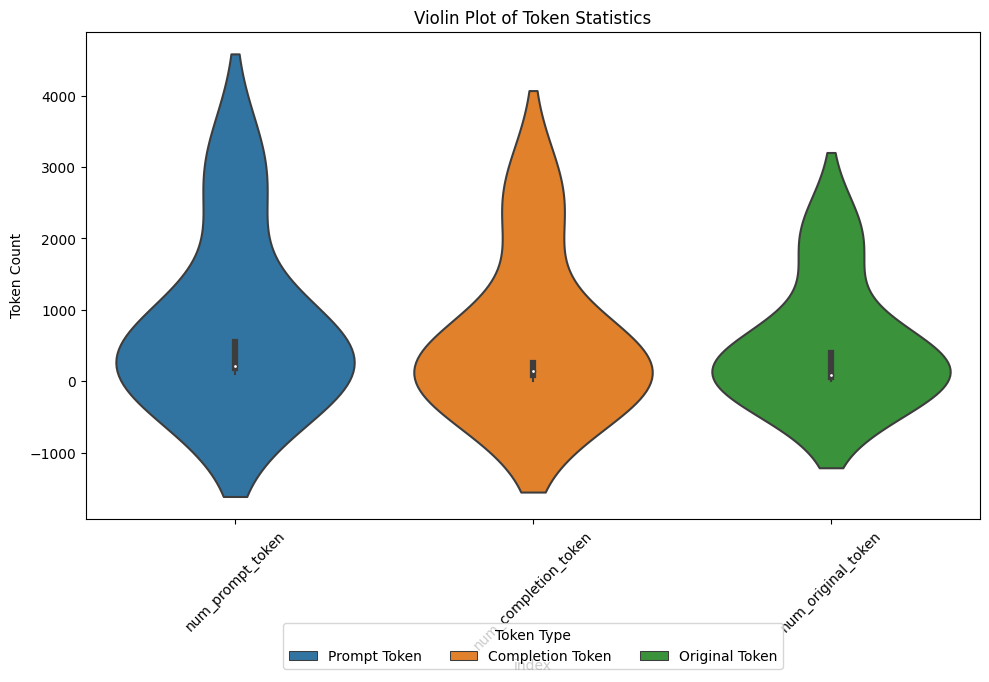

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data (from your provided statistics)
data = {
    'count': [43272.0, 43272.0, 43272.0],
    'mean': [405.937974, 178.941186, 256.562488],
    'std': [378.576432, 141.316384, 335.654452],
    'min': [97.0, 5.0, 7.0],
    '25%': [184.0, 83.0, 57.0],
    '50%': [217.0, 138.0, 84.0],
    '75%': [549.0, 254.0, 391.0],
    'max': [2874.0, 2514.0, 1985.0]
}

# df = pd.DataFrame(data, index=['Prompt Token', 'Completion Token', 'Original Token'])
df = F3_Llama_2[['num_prompt_token', 'num_completion_token', 'num_original_token']]

# Violin plot
plt.figure(figsize=(10, 7))
sns.violinplot(x='index', y='value', data=melted_df, hue='index', dodge=False)
plt.title('Violin Plot of Token Statistics')
plt.ylabel('Token Count')
# plt.xlabel('Token Type')
plt.xticks(rotation=45)

# Adjust legend
handles, _ = plt.gca().get_legend_handles_labels()
labels = ['Prompt Token', 'Completion Token', 'Original Token']
plt.legend(handles, labels, title='Token Type', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(labels))

plt.tight_layout()
plt.show()


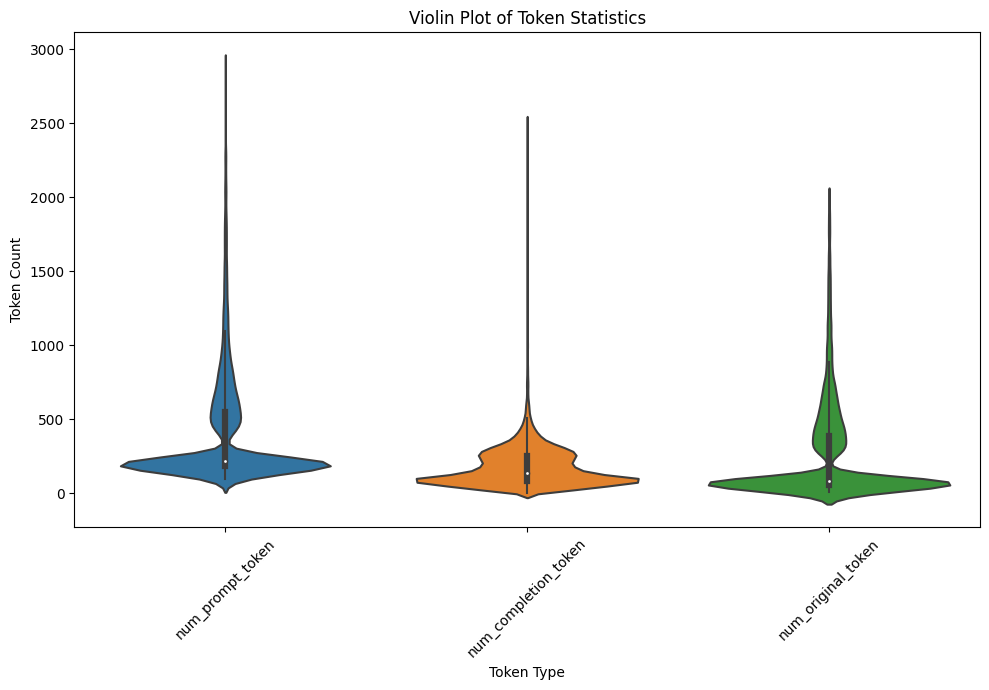

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the DataFrame for easier plotting with Seaborn
melted_df = pd.melt(df.reset_index(), value_vars=['num_prompt_token', 'num_completion_token', 'num_original_token'],
                   var_name='Token Type', value_name='Token Count')

# Create a violin plot
plt.figure(figsize=(10, 7))
sns.violinplot(x='Token Type', y='Token Count', data=melted_df)

# Set title and labels
plt.title('Violin Plot of Token Statistics')
plt.xlabel('Token Type')
plt.ylabel('Token Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


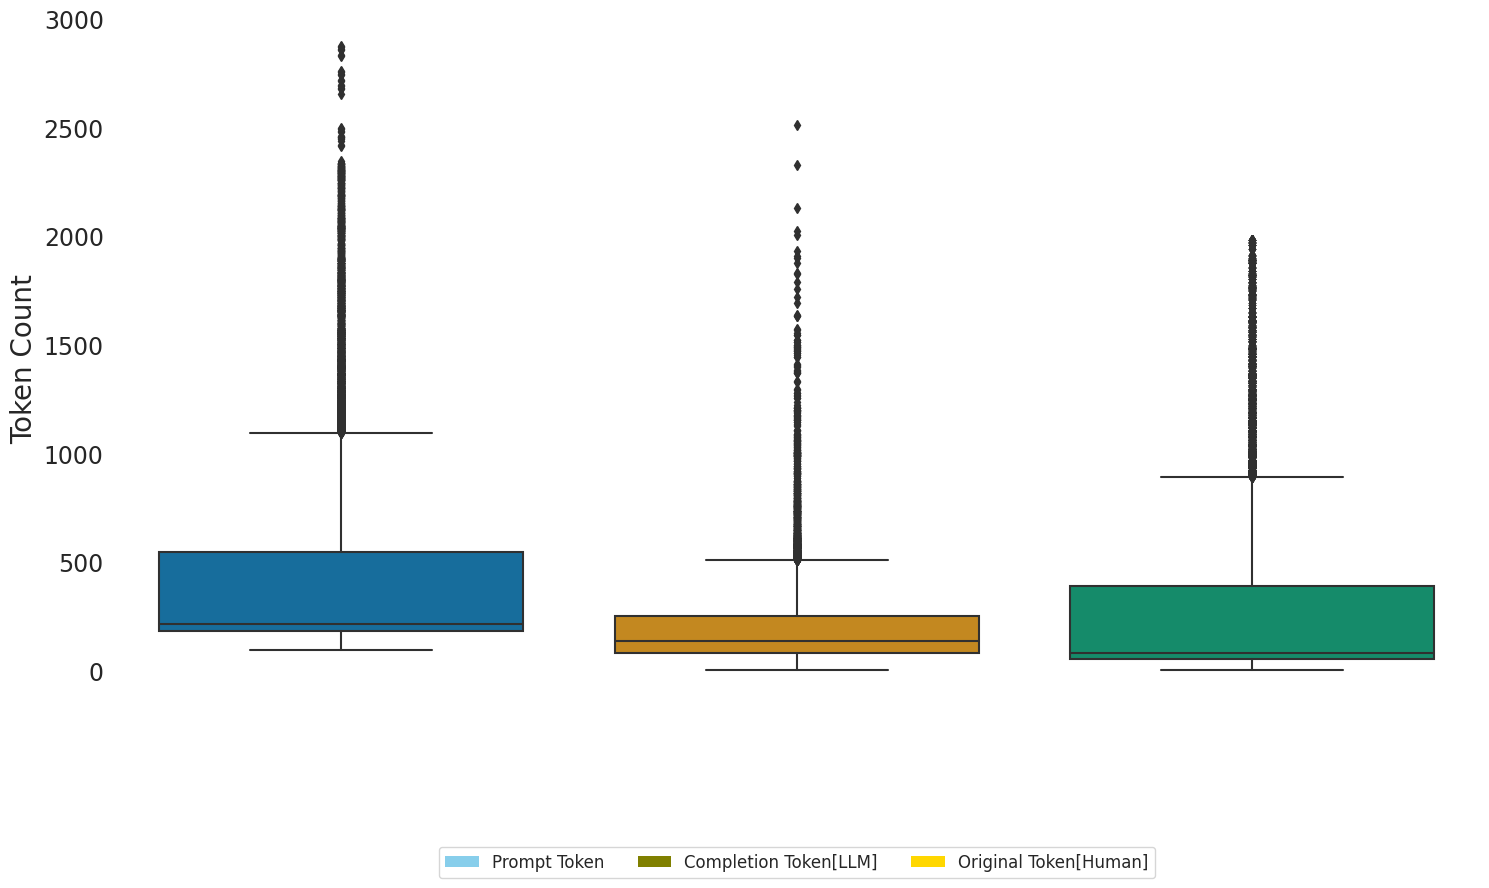

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
# df = F3_Llama_2[['num_prompt_token', 'num_completion_token', 'num_original_token']]

# Set the size of the figure and white background
plt.figure(figsize=(15, 9))
sns.set_style("white")

# Melt the DataFrame for easier plotting with Seaborn
melted_df = pd.melt(df.reset_index(), value_vars=['num_prompt_token', 'num_completion_token', 'num_original_token'],
                   var_name='Token Type', value_name='Token Count')

# Rename the 'Token Type' values for legend labeling
melted_df['Token Type'] = melted_df['Token Type'].map({
    'num_prompt_token': 'Prompt Token',
    'num_completion_token': 'Completion Token',
    'num_original_token': 'Original Token'
})

# Create a box plot
ax = sns.boxplot(x='Token Type', y='Token Count', data=melted_df, palette="colorblind")

# Set the title and labels
plt.xlabel('')
plt.ylabel('Token Count', fontsize=20)

# Increase the size of the numbers on the y-axis
ax.tick_params(axis='y', labelsize=17)

# Remove x-axis tick labels
ax.set_xticklabels([])

# Handle the legend manually to ensure consistent color box size
patch1 = plt.Rectangle((0,0), 1, 1, fc="skyblue", edgecolor="none")
patch2 = plt.Rectangle((0,0), 1, 1, fc="olive", edgecolor="none")
patch3 = plt.Rectangle((0,0), 1, 1, fc="gold", edgecolor="none")

ax.legend([patch1, patch2, patch3], ['Prompt Token', 'Completion Token[LLM]', 'Original Token[Human]'],
          fontsize='large', title_fontsize='20', loc='upper center',
          bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show grid
ax.grid(False)

# Display only horizontal grid lines
ax.yaxis.grid(False)

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


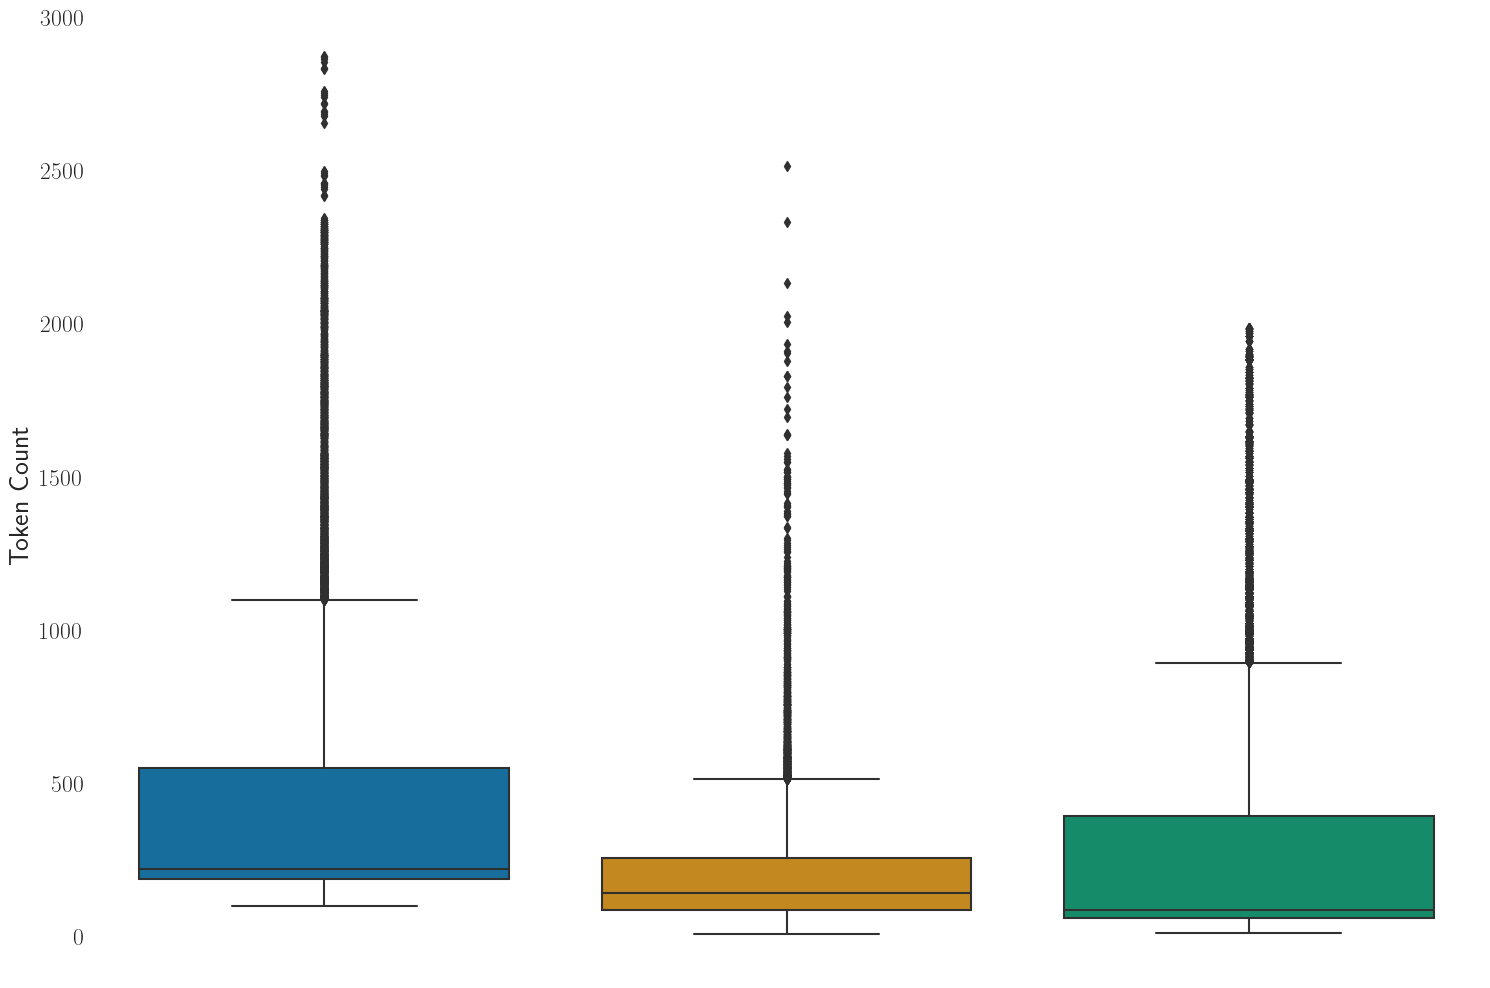

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Activate the LaTeX text interpreter
plt.rc('text', usetex=True)

# Set the size of the figure and white background
plt.figure(figsize=(15, 10))
sns.set_style("white")

# Create a boxplot
ax = sns.boxplot(data=df, palette="colorblind")

# Remove default x-axis labels
ax.set_xticklabels([])

# Set y-axis label and font size
ax.set_ylabel('Token Count', fontsize=20)

# Customize ticks and labels
ax.tick_params(axis='y', labelsize=17)

# Create custom legend
patch1 = mpatches.Patch(color=sns.color_palette("colorblind")[0], label='Prompt Token')
patch2 = mpatches.Patch(color=sns.color_palette("colorblind")[1], label=r'Completion Token{\bf{[LLM]}}')
patch3 = mpatches.Patch(color=sns.color_palette("colorblind")[2], label=r'Original Token{\bf{[Human]}}')

# ax.legend([patch1, patch2, patch3],
#           ['Prompt Token[Human + LLM]', r'Completion Token{\bf{[LLM]}}', r'Original Token{\bf{[Human]}}'],
#           fontsize='large', title_fontsize='20', loc='upper center',
#           bbox_to_anchor=(0.5, -0.2), ncol=3)

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust layout to fit legend
plt.tight_layout()

# Display the plot
plt.show()


In [24]:
F3_Llama_2.rename(columns={'human_written_content':'human_content', 'content': 'ai_content'}, inplace=True)
F3_Llama_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43272 entries, 0 to 43271
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uuid                         43272 non-null  object 
 1   human_content                43272 non-null  object 
 2   ai_content                   43272 non-null  object 
 3   model                        43272 non-null  object 
 4   num_completion_token         43272 non-null  int64  
 5   num_original_token           43272 non-null  int64  
 6   num_prompt_token             43272 non-null  int64  
 7   num_iagenerated_token        43272 non-null  int64  
 8   original_label               43272 non-null  object 
 9   source_type                  43272 non-null  object 
 10  ai_generated_label           43272 non-null  object 
 11  article_type                 43272 non-null  object 
 12  pre_post_GPT                 43272 non-null  object 
 13  dataset_source  

In [25]:
F3_Llama_2.GPT_NLI_Label.value_counts()

entailment        22424
not-entailment    18502
others             2346
Name: GPT_NLI_Label, dtype: int64

# Visualization

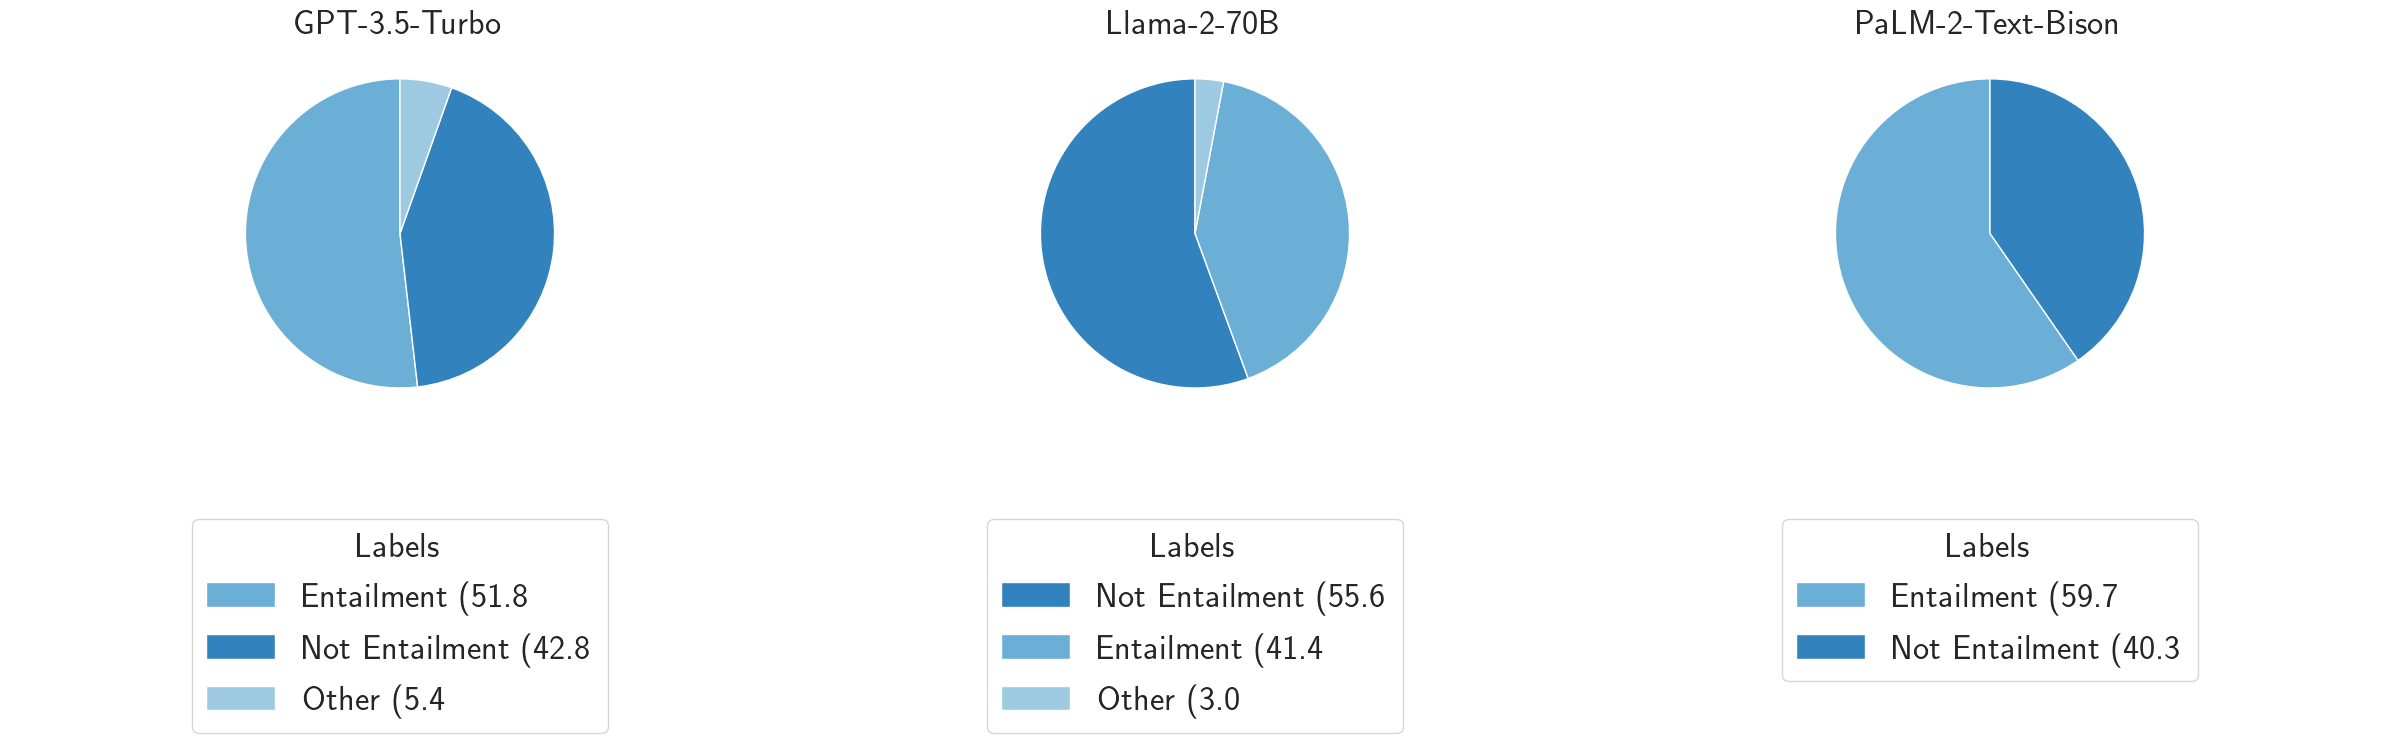

In [26]:

import numpy as np
import matplotlib.pyplot as plt

# Map "Other" to "other" and "others" to "other" for specific columns in the DataFrame
F3_Llama_2['Llama_NLI'] = F3_Llama_2['Llama_NLI'].replace({'Other': 'other', 'others': 'other'})
F3_Llama_2['GPT_NLI_Label'] = F3_Llama_2['GPT_NLI_Label'].replace({'Other': 'other', 'others': 'other'})

# Original column names in the dataset
columns_to_plot = ['GPT_NLI_Label', 'Llama_NLI', 'PaLM_NLI']

# Desired names for presentation
presentation_names = ['GPT-3.5-Turbo', 'Llama-2-70B', 'PaLM-2-Text-Bison']


def plot_pie_for_column(ax, df, column_name, presentation_name, colormap):
    # Extract sizes and labels for the given column
    sizes = df[column_name].value_counts().values
    labels = df[column_name].value_counts().index

    # Rename labels for presentation and calculate percentages
    renamed_labels = {"entailment": "Entailment", "not-entailment": "Not Entailment", "other": "Other"}
    labels_for_colors = [label for label in labels]
    labels = [renamed_labels.get(label, label) for label in labels]
    percentages = [f"{label} ({100*size/np.sum(sizes):.1f}%)" for label, size in zip(labels, sizes)]

    # Use the colormap to get consistent colors for the labels across the pie charts
    colors = [colormap[label] for label in labels_for_colors]

    # Plot pie chart
    wedges = ax.pie(sizes, colors=colors, startangle=90)[0]

    # Adjust axis, set title, and add legend with increased font size for title and items
    ax.axis('equal')
    ax.set_title(presentation_name, fontsize=25)  # Adjusted fontsize to 25
    ax.legend(wedges, percentages, title="Labels", loc="upper center",
              bbox_to_anchor=(0.5, -0.2), fontsize=25, title_fontsize=25)  # Adjusted fontsize to 25


# Combine all values across the columns to get unique labels
all_labels = F3_Llama_2[columns_to_plot].melt().value.dropna().unique()

# Assign unique colors from a colormap to each label
colormap = {label: color for label, color in zip(all_labels, plt.cm.tab20c.colors)}

# Create a figure with multiple axes
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(24, 8))

# Plot each column on its own axis
for ax, col, pname in zip(axes, columns_to_plot, presentation_names):
    plot_pie_for_column(ax, F3_Llama_2, col, pname, colormap)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new DataFrame with concatenated columns
F3_Llama_2['GPT_NLI_plus_ai_label'] = F3_Llama_2['GPT_NLI_Label'].astype(str) + "_" + F3_Llama_2['ai_generated_label'].astype(str)
F3_Llama_2['Llama_NLI_plus_ai_label'] = F3_Llama_2['Llama_NLI'].astype(str) + "_" + F3_Llama_2['ai_generated_label'].astype(str)
F3_Llama_2['PaLM_NLI_plus_ai_label'] = F3_Llama_2['PaLM_NLI'].astype(str) + "_" + F3_Llama_2['ai_generated_label'].astype(str)


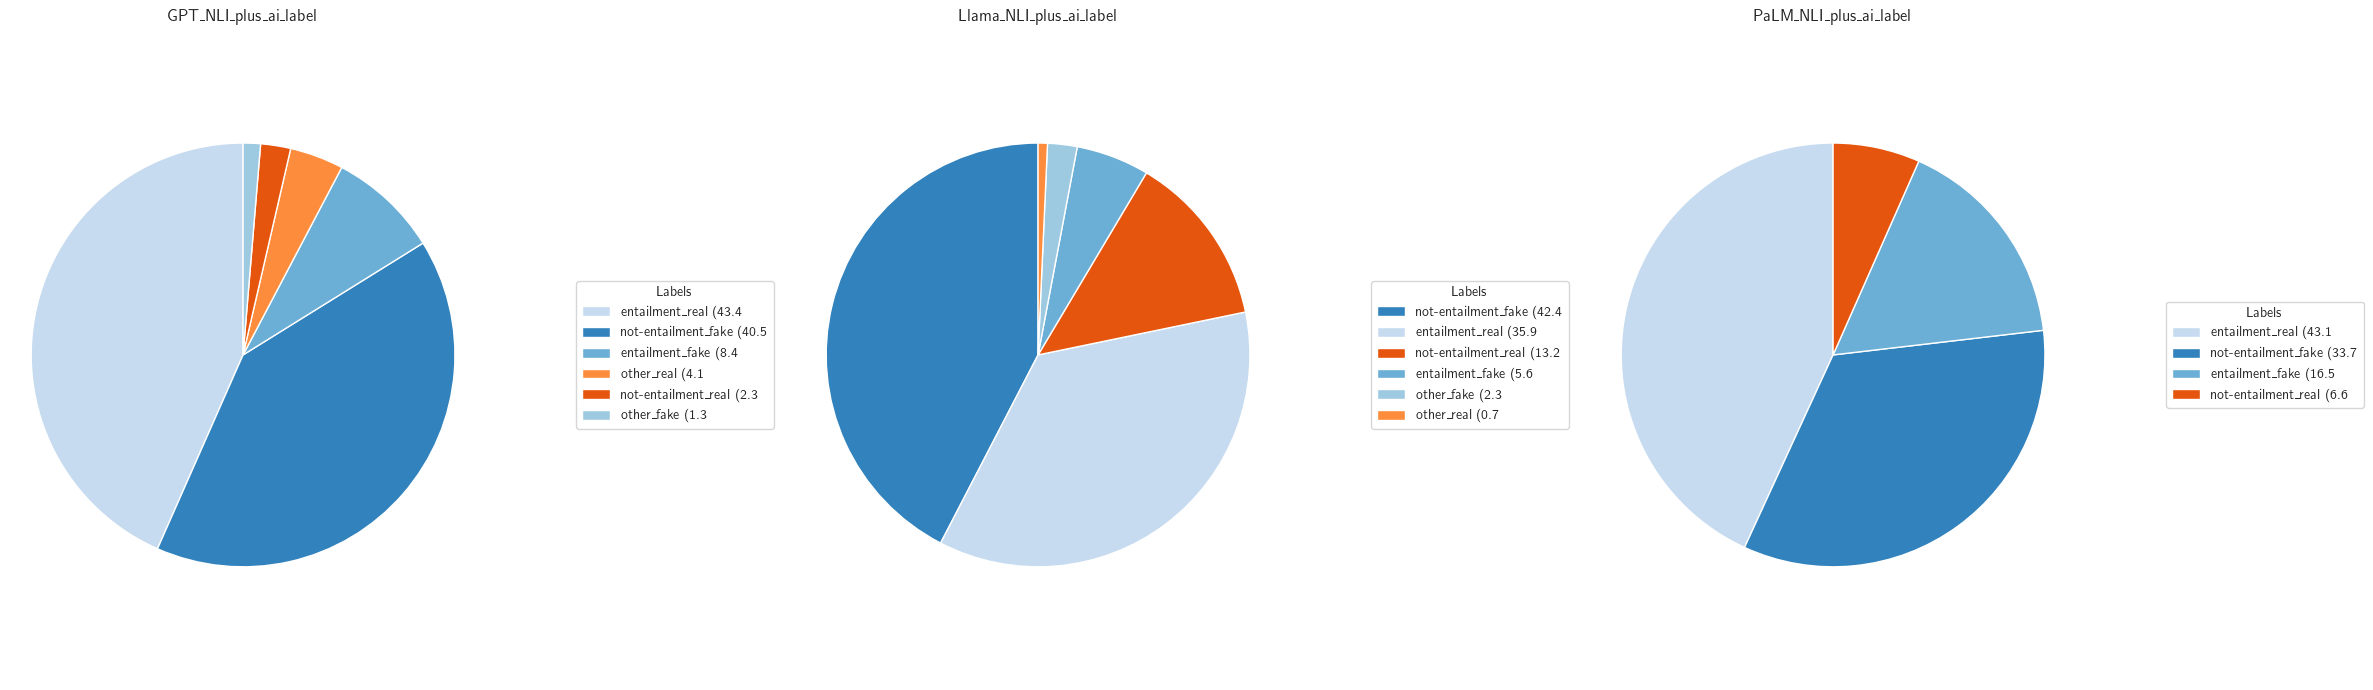

In [28]:
import numpy as np
columns_to_plot = ['GPT_NLI_plus_ai_label', 'Llama_NLI_plus_ai_label', 'PaLM_NLI_plus_ai_label']
def plot_pie_for_column(ax, df, column_name, colormap):
    sizes = df[column_name].value_counts().values
    labels = df[column_name].value_counts().index
    total = np.sum(sizes)
    percentages = [f"{label} ({size/total:.1%})" for label, size in zip(labels, sizes)]

    # Use the colormap to assign the same color to the same label across different pie charts
    colors = [colormap[label] for label in labels]

    # Only plot the wedges
    wedges = ax.pie(sizes, colors=colors, startangle=90)[0]

    ax.axis('equal')
    ax.set_title(column_name)
    ax.legend(wedges, percentages, title="Labels", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1))

# Combine all values across all three columns to make a unique color map
all_labels = F3_Llama_2[columns_to_plot].melt().value.dropna().unique()
colormap = {label: color for label, color in zip(all_labels, plt.cm.tab20c.colors)}

# Create a figure with multiple axes
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(24, 7))

# Plot each column on its own axis
for ax, col in zip(axes, columns_to_plot):
    plot_pie_for_column(ax, F3_Llama_2, col, colormap)

plt.tight_layout()
plt.show()


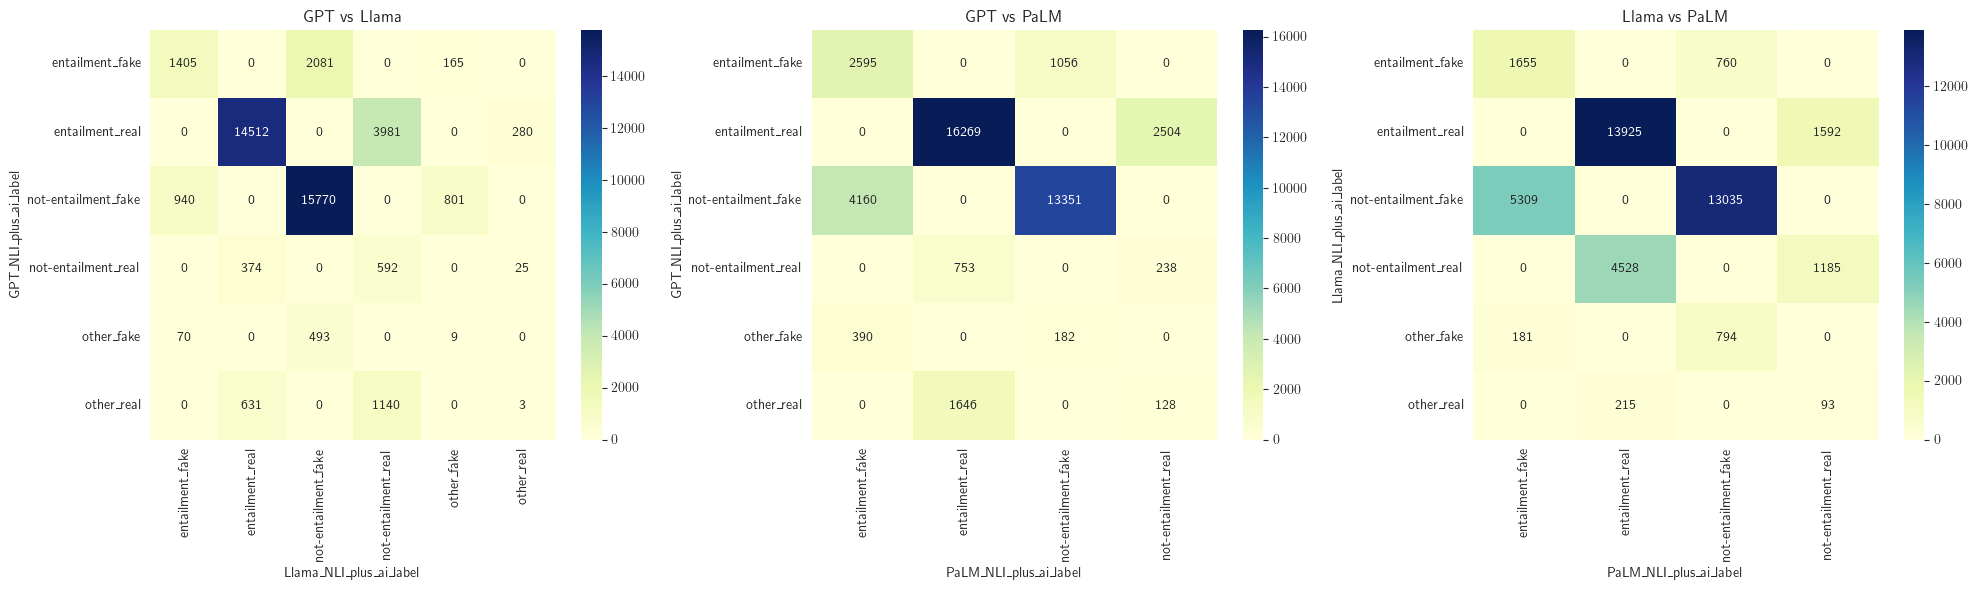

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def co_occurrence_matrix(col1, col2):
    return pd.crosstab(col1, col2)

# Compute the co-occurrence matrices
mat1 = co_occurrence_matrix(F3_Llama_2['GPT_NLI_plus_ai_label'], F3_Llama_2['Llama_NLI_plus_ai_label'])
mat2 = co_occurrence_matrix(F3_Llama_2['GPT_NLI_plus_ai_label'], F3_Llama_2['PaLM_NLI_plus_ai_label'])
mat3 = co_occurrence_matrix(F3_Llama_2['Llama_NLI_plus_ai_label'], F3_Llama_2['PaLM_NLI_plus_ai_label'])

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(mat1, annot=True, fmt='d', ax=axes[0], cmap="YlGnBu")
axes[0].set_title('GPT vs Llama')

sns.heatmap(mat2, annot=True, fmt='d', ax=axes[1], cmap="YlGnBu")
axes[1].set_title('GPT vs PaLM')

sns.heatmap(mat3, annot=True, fmt='d', ax=axes[2], cmap="YlGnBu")
axes[2].set_title('Llama vs PaLM')

plt.tight_layout()
plt.show()


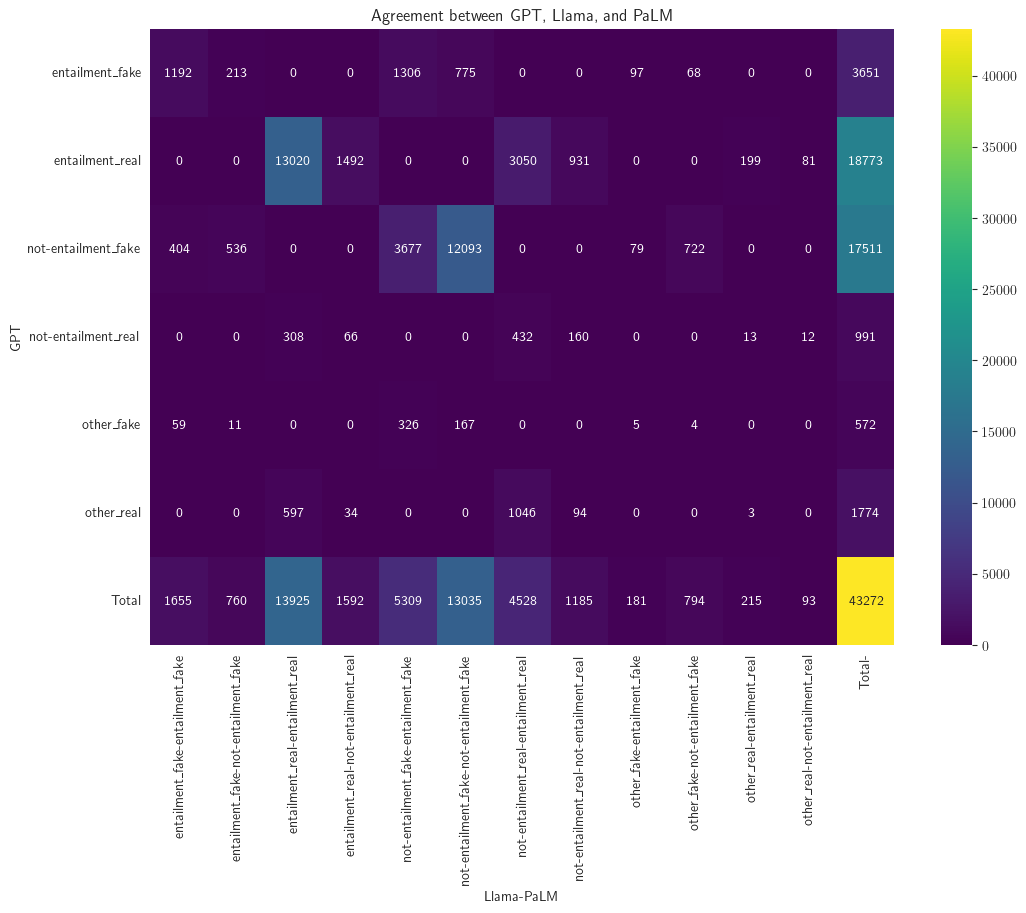

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cross-tabulation
cross_tab = pd.crosstab(F3_Llama_2['GPT_NLI_plus_ai_label'],
                        [F3_Llama_2['Llama_NLI_plus_ai_label'], F3_Llama_2['PaLM_NLI_plus_ai_label']],
                        rownames=['GPT'],
                        colnames=['Llama', 'PaLM'],
                        margins=True,
                        margins_name="Total")

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt="d")
plt.title('Agreement between GPT, Llama, and PaLM')
plt.show()


<ipython-input-31-b38b9d1e2a76>:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  total_values = cross_tab.loc['Total', :].drop('Total')  # Drop the grand total


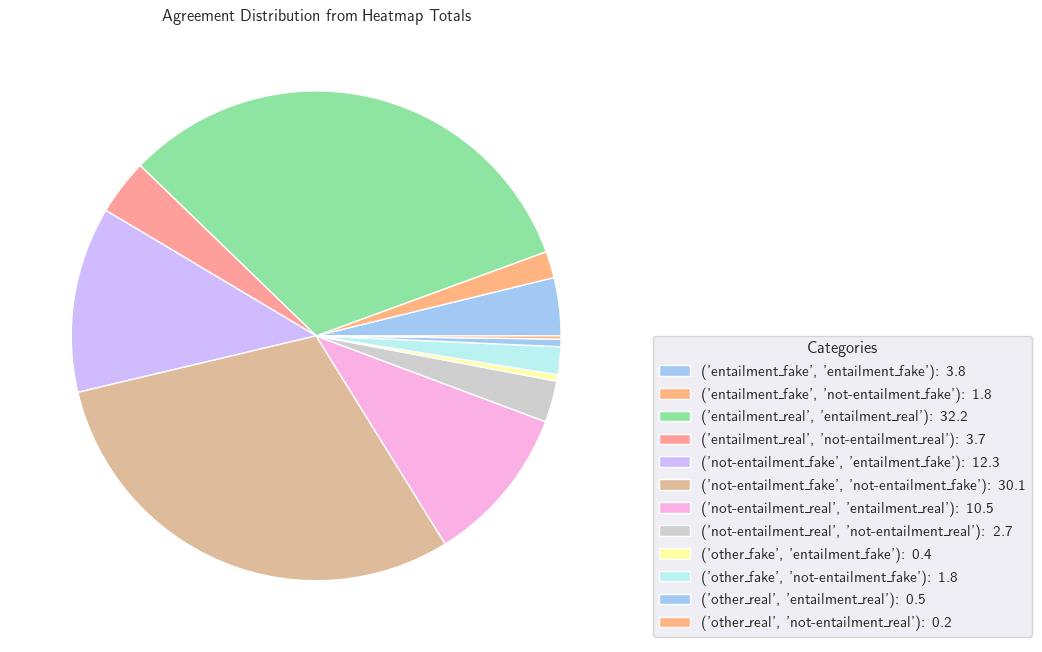

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setup Seaborn styles
sns.set()

# Extract the "Total" row from the cross-tabulation
total_values = cross_tab.loc['Total', :].drop('Total')  # Drop the grand total

# Calculate the percentages for each segment
percentages = 100 * total_values / total_values.sum()

# Plot the pie chart with labels as placeholders
fig, ax = plt.subplots(figsize=(10, 7))
wedges, _ = ax.pie(total_values, colors=sns.color_palette('pastel', len(total_values)))

# Set the title
ax.set_title('Agreement Distribution from Heatmap Totals')

# Define the legend labels with percentages
legend_labels = [f'{label}: {percentage:.1f}%' for label, percentage in zip(total_values.index, percentages)]

# Display the legend
ax.legend(wedges, legend_labels, title="Categories", loc="best", bbox_to_anchor=(1.05, 0.5), borderaxespad=0)

plt.tight_layout()
plt.show()


# PURIFY
Prompt Unraveling and Removing `Interface` for Fabricated Hallucinations Yarns

## Logical Consistency

We use
the majority votes of NLI results between GPT-3.5-
turbo, PaLM-2 (Anil et al., 2023), and LLaMA-2
(Rozière et al., 2023).

In [32]:
F3_Llama_2 = F3_Llama_2[F3_Llama_2['GPT_NLI_Label']!= 'others']
F3_Llama_2 = F3_Llama_2[F3_Llama_2['Llama_NLI']!= 'other']

### Majority Vote

The code below provide 1 option for majority vote and the other for consensus vote

In [33]:
# #Uncomment top run consensus/unanimous vote

# def check_logical_consistency(row):
#     # Check if all values in the row are "entailment_real"
#     all_entailment_real = all(value == "entailment_real" for value in row)

#     # Check if all values in the row are "not-entailment_false"
#     all_not_entailment_false = all(value == "not-entailment_fake" for value in row)

#     # Return "consistent" if either of the conditions is met, otherwise return "inconsistent"
#     return "consistent" if all_entailment_real or all_not_entailment_false else "inconsistent"

# # Apply the function to relevant columns and assign to the new column
# F3_Llama_2['Logical Consistency'] = F3_Llama_2[['GPT_NLI_plus_ai_label', 'Llama_NLI_plus_ai_label', 'PaLM_NLI_plus_ai_label']].apply(check_logical_consistency, axis=1)


#Majority Vote
def check_logical_consistency(row):
    valid_values = {"entailment_real", "not-entailment_fake"}

    # Count how many values in the row are either "entailment_real" or "not-entailment_fake"
    count_valid_values = sum(value in valid_values for value in row)
    # print(f'{row}: {count_valid_values}')
    # Check if 2 out of 3 (or all 3) labels are valid
    if count_valid_values >= 2:
      return "consistent"
    else:
      return "inconsistent"

# Apply the function to relevant columns and assign to the new column
F3_Llama_2['Logical Consistency'] = F3_Llama_2[['GPT_NLI_plus_ai_label', 'Llama_NLI_plus_ai_label', 'PaLM_NLI_plus_ai_label']].apply(check_logical_consistency, axis=1)

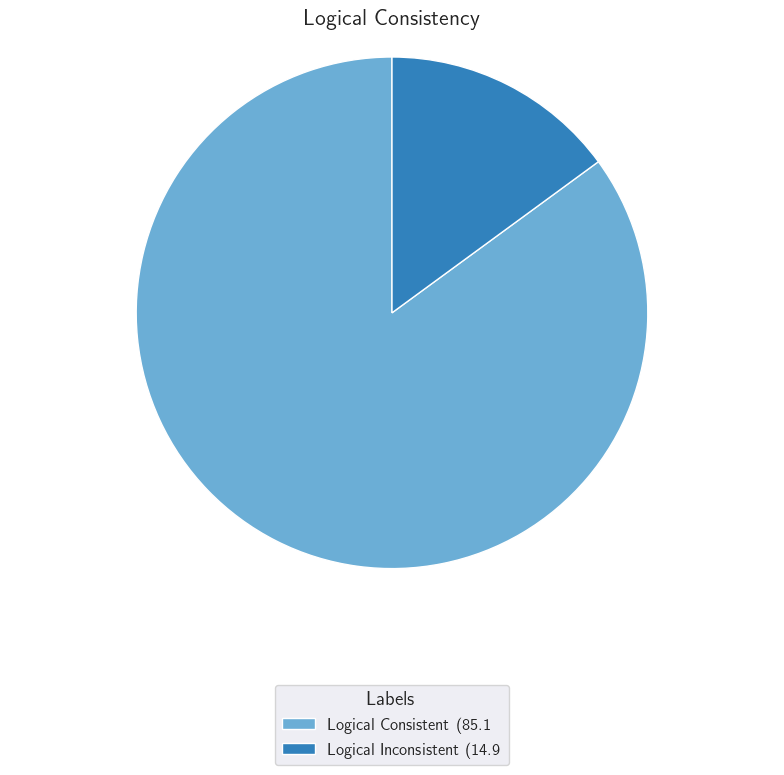

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Mapping "Logical Consistent" to "Consistent" and "Logical Inconsistent" to "Inconsistent"
F3_Llama_2['Logical Consistency'] = F3_Llama_2['Logical Consistency'].replace({
     'consistent': 'Logical Consistent',
     'inconsistent' : 'Logical Inconsistent'
})

def plot_pie_for_column(ax, df, column_name, colormap):
    # Extract sizes and labels for the given column
    sizes = df[column_name].value_counts().values
    labels = df[column_name].value_counts().index

    # Calculate percentages for the legend
    total = np.sum(sizes)
    percentages = [f"{label} ({size/total:.1%})" for label, size in zip(labels, sizes)]

    # Use the colormap to get consistent colors for the labels
    colors = [colormap[label] for label in labels]

    # Plot pie chart
    wedges = ax.pie(sizes, colors=colors, startangle=90)[0]

    # Adjust axis and add legend
    ax.axis('equal')
    ax.legend(wedges, percentages, title="Labels", loc="upper center", bbox_to_anchor=(0.5, -0.15), fontsize=12, title_fontsize=14)

    # Set title centered above the pie chart with increased font size
    ax.set_title(column_name, position=(0.5, 1.05), fontsize=16)

# Extract unique labels for the 'Logical Consistency' column
all_labels = F3_Llama_2['Logical Consistency'].dropna().unique()

# Assign unique colors from a colormap to each label
colormap = {label: color for label, color in zip(all_labels, plt.cm.tab20c.colors)}

# Create a figure
fig, ax = plt.subplots(figsize=(8, 8))

# Plot 'Logical Consistency' column
plot_pie_for_column(ax, F3_Llama_2, 'Logical Consistency', colormap)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [35]:
# F3_Llama_2.drop('Logical Consistency', axis=1, inplace=True)
F3_Llama_2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41989 entries, 0 to 43271
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uuid                         41989 non-null  object 
 1   human_content                41989 non-null  object 
 2   ai_content                   41989 non-null  object 
 3   model                        41989 non-null  object 
 4   num_completion_token         41989 non-null  int64  
 5   num_original_token           41989 non-null  int64  
 6   num_prompt_token             41989 non-null  int64  
 7   num_iagenerated_token        41989 non-null  int64  
 8   original_label               41989 non-null  object 
 9   source_type                  41989 non-null  object 
 10  ai_generated_label           41989 non-null  object 
 11  article_type                 41989 non-null  object 
 12  pre_post_GPT                 41989 non-null  object 
 13  dataset_source  

In [36]:
# Filter out rows that have 'Logical Consistency' marked as 'Consistent'
consistent_rows = F3_Llama_2[F3_Llama_2['Logical Consistency'] == 'consistent']

# Count the occurrences of 'not-entailment_false' and 'entailment_real' in the stratified column
counts = consistent_rows['PaLM_NLI_plus_ai_label'].value_counts()

print(counts)


Series([], Name: PaLM_NLI_plus_ai_label, dtype: int64)


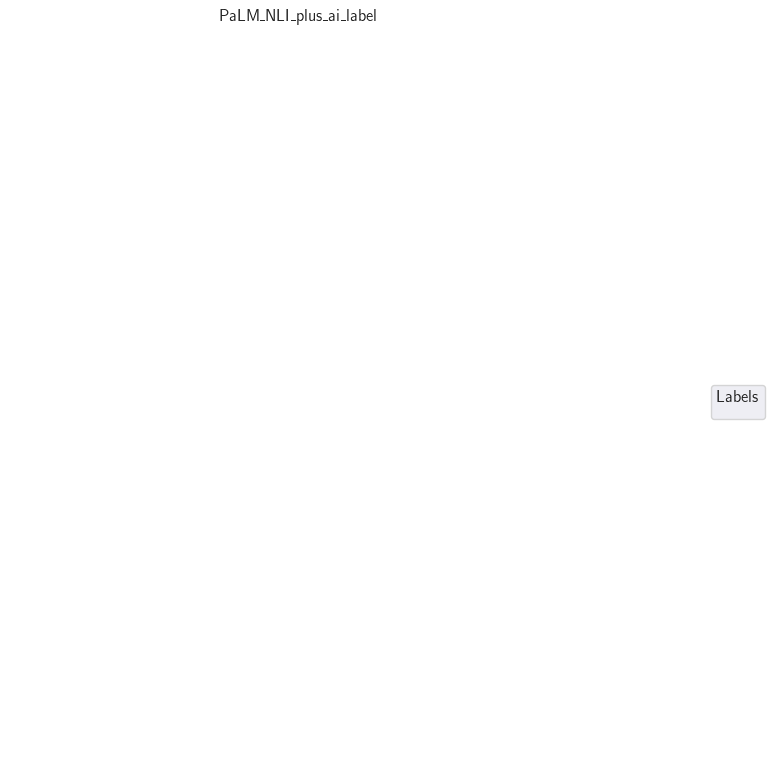

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pie_for_column(ax, df, column_name, colormap):
    # Extract sizes and labels for the given column
    sizes = df[column_name].value_counts().values
    labels = df[column_name].value_counts().index

    # Calculate percentages for the legend
    total = np.sum(sizes)
    percentages = [f"{label} ({size/total:.1%})" for label, size in zip(labels, sizes)]

    # Use the colormap to get consistent colors for the labels
    colors = [colormap[label] for label in labels]

    # Plot pie chart
    wedges = ax.pie(sizes, colors=colors, startangle=90)[0]

    # Adjust axis and add legend
    ax.axis('equal')
    ax.legend(wedges, percentages, title="Labels", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1))

    # Set title centered above the pie chart
    ax.set_title(column_name, position=(0.5, 1.05))

# Filter out rows that have 'Logical Consistency' marked as 'consistent'
consistent_rows = F3_Llama_2[F3_Llama_2['Logical Consistency'] == 'consistent']

# Extract unique labels for the 'PaLM_NLI_plus_ai_label' column from consistent rows
all_labels = consistent_rows['PaLM_NLI_plus_ai_label'].dropna().unique()

# Assign unique colors from a colormap to each label
colormap = {label: color for label, color in zip(all_labels, plt.cm.tab20c.colors)}

# Create a figure
fig, ax = plt.subplots(figsize=(8, 8))

# Plot 'PaLM_NLI_plus_ai_label' column of consistent_rows
plot_pie_for_column(ax, consistent_rows, 'PaLM_NLI_plus_ai_label', colormap)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


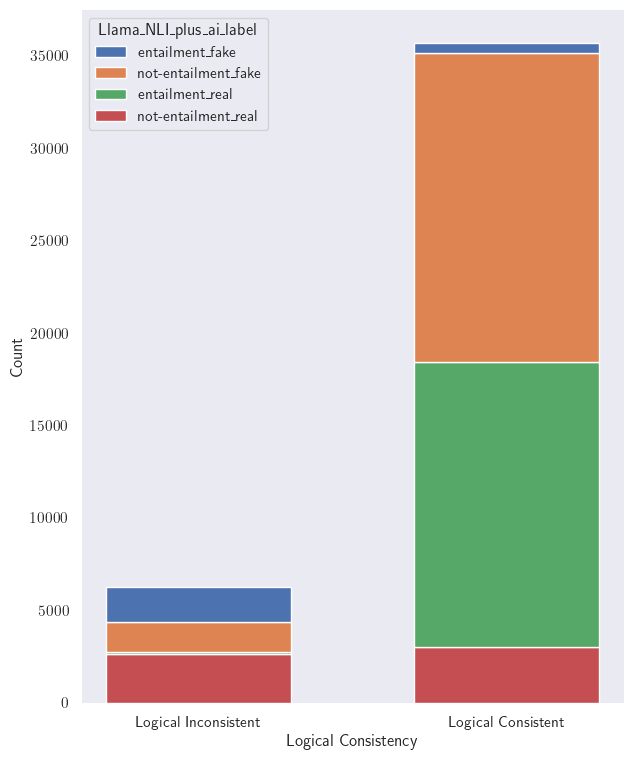

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette
palette = sns.color_palette("tab10", n_colors=F3_Llama_2['Llama_NLI_plus_ai_label'].nunique())

# Set the figure size
plt.figure(figsize=(7, 9))

# Plotting the data with adjusted bar width and larger figure size
sns.histplot(data=F3_Llama_2, x='Logical Consistency', hue='Llama_NLI_plus_ai_label',  multiple="stack", shrink=0.6,  alpha=1)
# Remove the border lines
sns.despine(left=True, bottom=True)
# Remove the grid lines
plt.grid(False)
plt.grid(False)
plt.show()
# remove grid lines



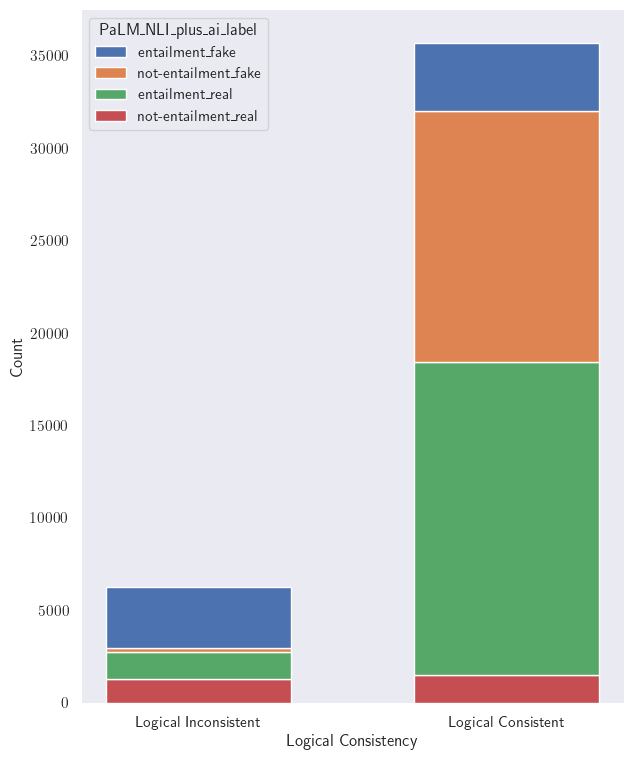

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette
palette = sns.color_palette("tab10", n_colors=F3_Llama_2['Llama_NLI_plus_ai_label'].nunique())


# Set the figure size
plt.figure(figsize=(7, 9))

# Plotting the data with adjusted bar width and larger figure size
sns.histplot(data=F3_Llama_2, x='Logical Consistency', hue='PaLM_NLI_plus_ai_label',  multiple="stack", shrink=0.6,  alpha=1)
# Remove the border lines
sns.despine(left=True, bottom=True)
# Remove the grid lines
plt.grid(False)
plt.grid(False)
plt.show()
# remove grid lines



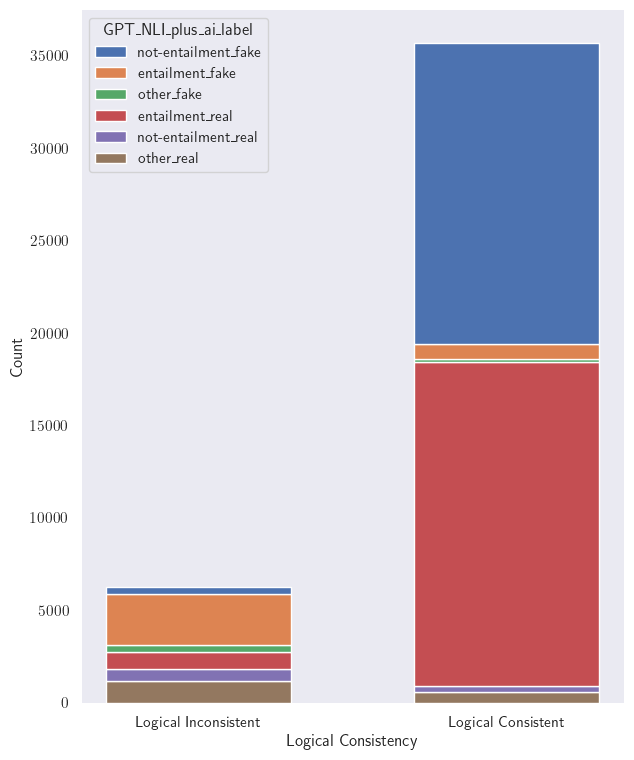

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette
palette = sns.color_palette("tab10", n_colors=F3_Llama_2['Llama_NLI_plus_ai_label'].nunique())

# Set the figure size
plt.figure(figsize=(7, 9))

# Plotting the data with adjusted bar width and larger figure size
sns.histplot(data=F3_Llama_2, x='Logical Consistency', hue='GPT_NLI_plus_ai_label',  multiple="stack", shrink=0.6,  alpha=1)
# Remove the border lines
sns.despine(left=True, bottom=True)
# Remove the grid lines
plt.grid(False)
plt.grid(False)
plt.show()




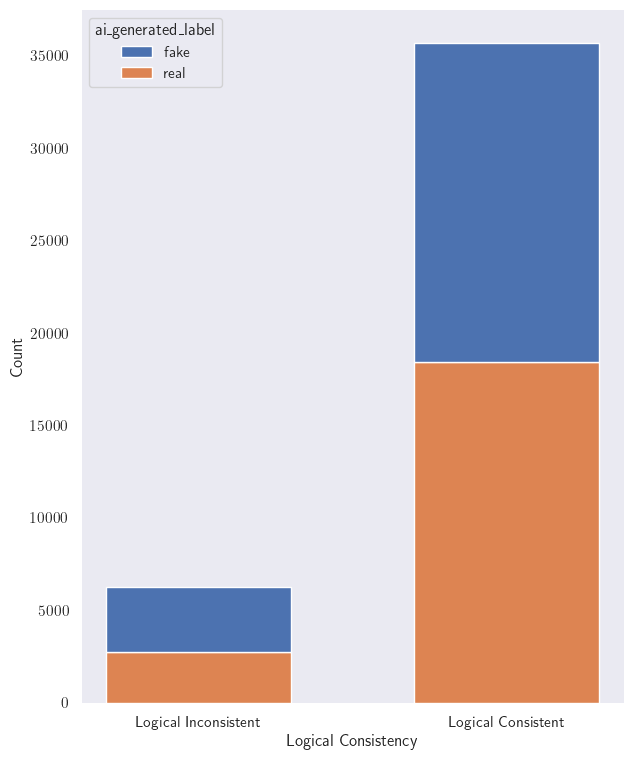

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette
palette = sns.color_palette("tab10", n_colors=F3_Llama_2['ai_generated_label'].nunique())

# Set the figure size
plt.figure(figsize=(7, 9))

# Plotting the data with adjusted bar width and larger figure size
sns.histplot(data=F3_Llama_2, x='Logical Consistency', hue='ai_generated_label',  multiple="stack", shrink=0.6,  alpha=1)
# Remove the border lines
sns.despine(left=True, bottom=True)
# Remove the grid lines
plt.grid(False)
plt.grid(False)
plt.show()


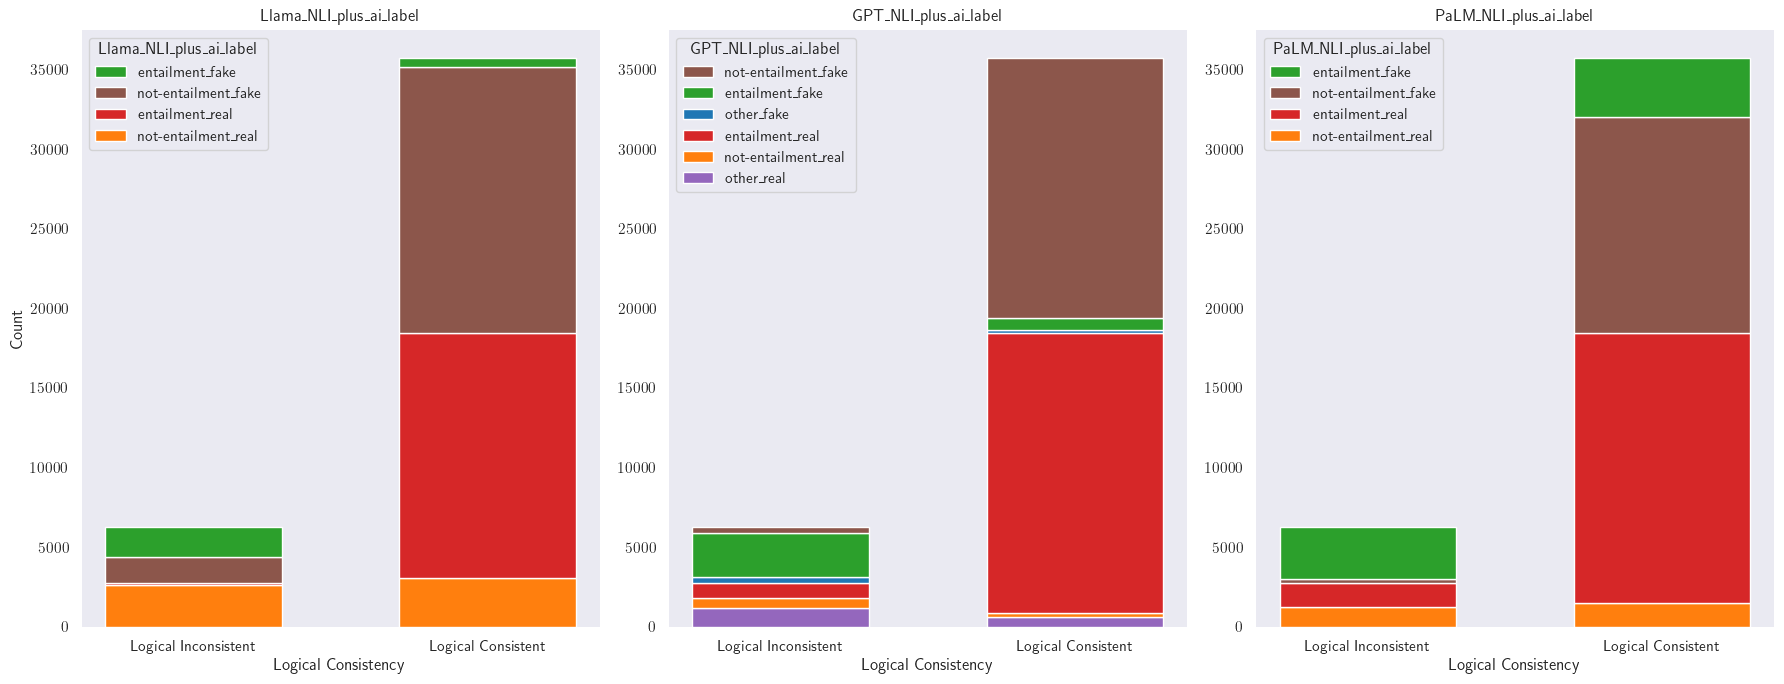

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract unique categories from all three columns
all_categories = list(set(F3_Llama_2['Llama_NLI_plus_ai_label'].unique().tolist() +
                          F3_Llama_2['GPT_NLI_plus_ai_label'].unique().tolist() +
                          F3_Llama_2['PaLM_NLI_plus_ai_label'].unique().tolist()))

# Define a color palette for these categories
palette = dict(zip(all_categories, sns.color_palette("tab10", n_colors=len(all_categories))))

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# Plot Llama_NLI_plus_ai_label
sns.histplot(data=F3_Llama_2, x='Logical Consistency', hue='Llama_NLI_plus_ai_label', multiple="stack", shrink=0.6, alpha=1, palette=palette, ax=axes[0])
axes[0].set_title('Llama_NLI_plus_ai_label')

# Plot GPT_NLI_plus_ai_label
sns.histplot(data=F3_Llama_2, x='Logical Consistency', hue='GPT_NLI_plus_ai_label', multiple="stack", shrink=0.6, alpha=1, palette=palette, ax=axes[1])
axes[1].set_title('GPT_NLI_plus_ai_label')
axes[1].set_ylabel('')  # Remove y-label for the second plot

# Plot PaLM_NLI_plus_ai_label
sns.histplot(data=F3_Llama_2, x='Logical Consistency', hue='PaLM_NLI_plus_ai_label', multiple="stack", shrink=0.6, alpha=1, palette=palette, ax=axes[2])
axes[2].set_title('PaLM_NLI_plus_ai_label')
axes[2].set_ylabel('')  # Remove y-label for the third plot

# Remove the border lines and grid lines
for ax in axes:
    sns.despine(left=True, bottom=True, ax=ax)
    ax.grid(False)

# Adjust the layout
plt.tight_layout()
plt.show()


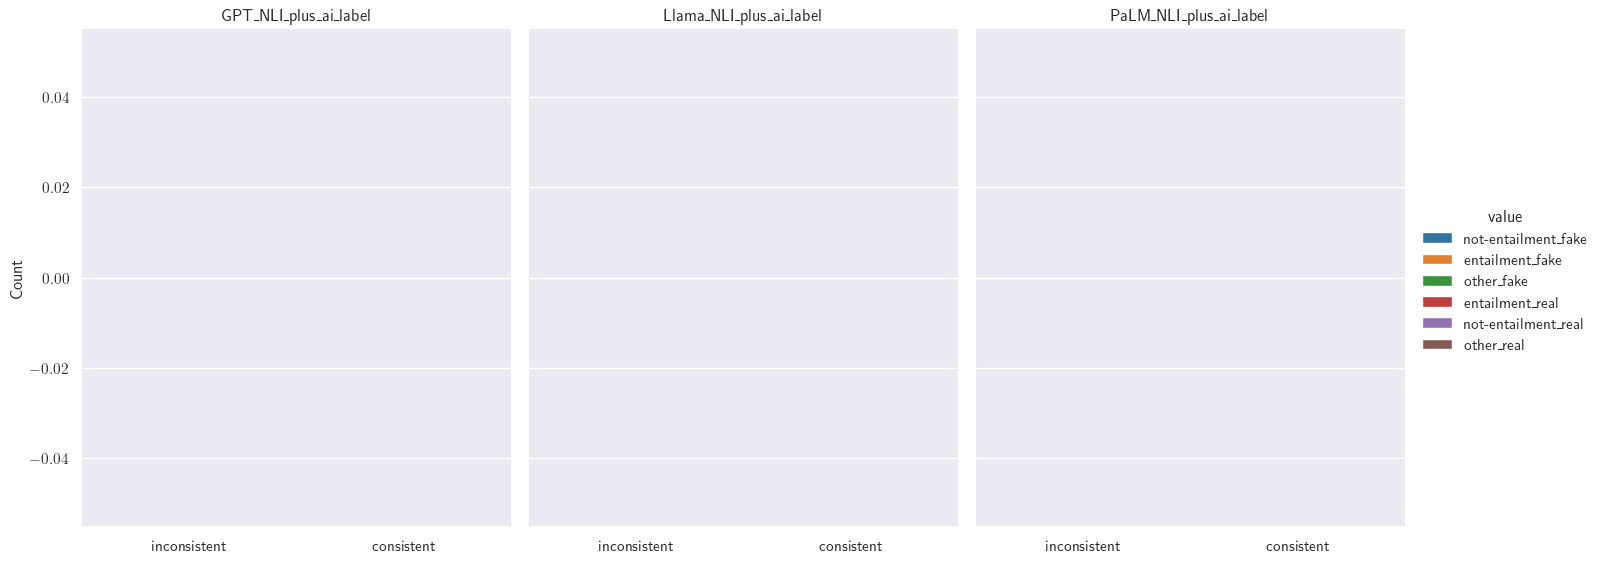

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame for plotting
df_melted = F3_Llama_2.melt(id_vars='Logical Consistency', value_vars=['GPT_NLI_plus_ai_label', 'Llama_NLI_plus_ai_label', 'PaLM_NLI_plus_ai_label'])

# Reorder the levels
df_melted['Logical Consistency'] = pd.Categorical(df_melted['Logical Consistency'], categories=['inconsistent', 'consistent'], ordered=True)

# Use catplot for a side-by-side bar comparison
g = sns.catplot(data=df_melted, x='Logical Consistency', hue='value', col='variable', kind='count', height=6, aspect=0.8, palette="tab10")

# Adjust titles
g.set_titles("{col_name}")
g.set_axis_labels("", "Count")

# Remove the border lines
sns.despine(left=True, bottom=True)

plt.show()


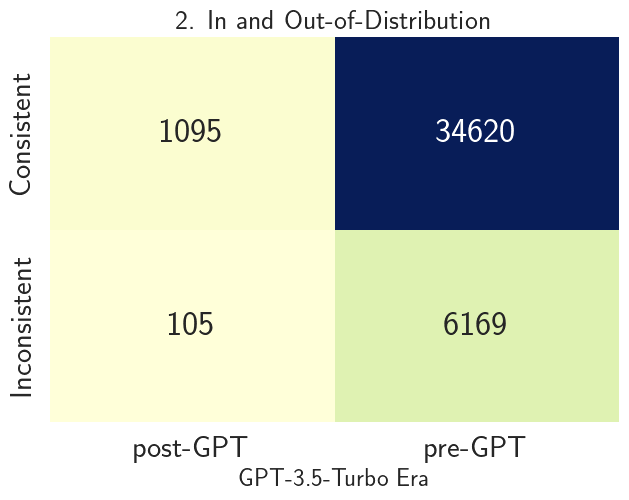

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping 'consistent' to 'Consistent' and 'inconsistent' to 'Inconsistent'
F3_Llama_2['Logical Consistency'] = F3_Llama_2['Logical Consistency'].replace({
    'Logical Consistent': 'Consistent',
    'Logical Inconsistent' : 'Inconsistent'
})

# Create the confusion matrix (cross-tabulation)
conf_matrix = pd.crosstab(F3_Llama_2['Logical Consistency'], F3_Llama_2['pre_post_GPT'])

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(7.34, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False, annot_kws={"size": 25})  # Increased font size for numbers with annot_kws
plt.title('2. In and Out-of-Distribution', fontsize=20)  # Increased font size for title
plt.ylabel('', fontsize=18)
plt.xlabel('GPT-3.5-Turbo Era', fontsize=18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()



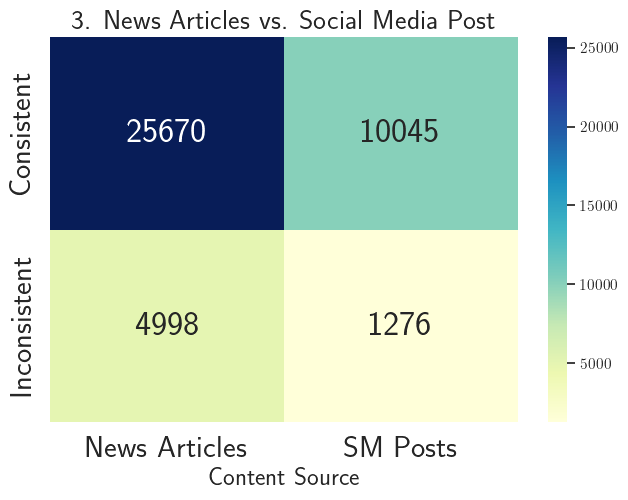

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping 'Logical Consistent' to 'Consistent' and 'Logical Inconsistent' to 'Inconsistent'
F3_Llama_2['Logical Consistency'] = F3_Llama_2['Logical Consistency'].replace({
    'Logical Consistent': 'Consistent',
    'Logical Inconsistent': 'Inconsistent'
})

# Mapping 'article_type' values
F3_Llama_2['article_type'] = F3_Llama_2['article_type'].replace({
    'news article': 'News Articles',
    'twitter post': 'SM Posts'
})


# Create the confusion matrix (cross-tabulation) for the second diagram
conf_matrix2 = pd.crosstab(F3_Llama_2['Logical Consistency'], F3_Llama_2['article_type'])

# Plotting the confusion matrix using seaborn for the second diagram
plt.figure(figsize=(7.55, 5))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="YlGnBu", cbar=True, annot_kws={"size": 25})
plt.title('3. News Articles vs. Social Media Post', fontsize=20)
plt.ylabel('', fontsize=18)
plt.xlabel('Content Source', fontsize=18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()


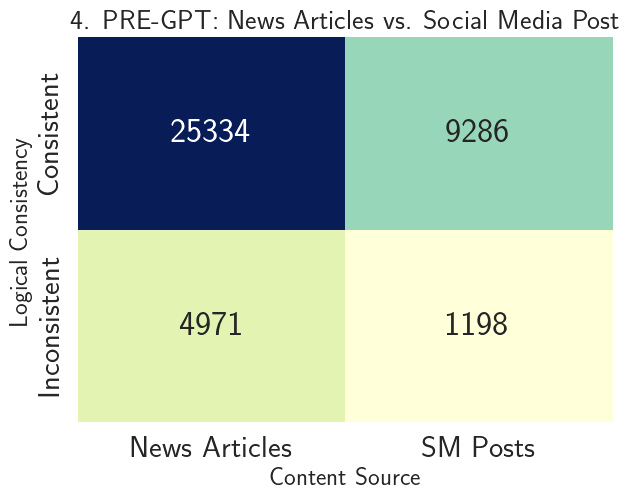

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping 'Logical Consistent' to 'Consistent' and 'Logical Inconsistent' to 'Inconsistent'
F3_Llama_2['Logical Consistency'] = F3_Llama_2['Logical Consistency'].replace({
    'Logical Consistent': 'Consistent',
    'Logical Inconsistent': 'Inconsistent'
})

#


# Filter the dataframe for the second diagram
filtered_data = F3_Llama_2[F3_Llama_2['pre_post_GPT'] == "pre-GPT"]

# Create the confusion matrix (cross-tabulation) for the second diagram
conf_matrix = pd.crosstab(filtered_data['Logical Consistency'], filtered_data['article_type'])

# Plotting the confusion matrix using seaborn for the second diagram
plt.figure(figsize=(6.9, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False, annot_kws={"size": 25})
plt.title('4. PRE-GPT: News Articles vs. Social Media Post', fontsize=20)
plt.ylabel('Logical Consistency', fontsize=18)
plt.xlabel('Content Source', fontsize=18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()


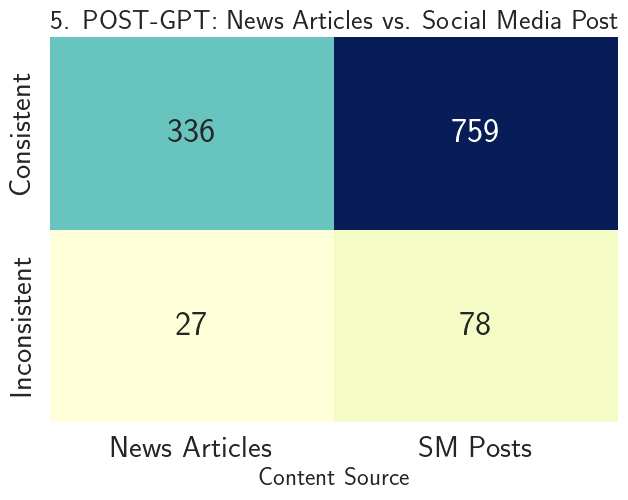

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping 'Logical Consistent' to 'Consistent' and 'Logical Inconsistent' to 'Inconsistent'
F3_Llama_2['Logical Consistency'] = F3_Llama_2['Logical Consistency'].replace({
    'Logical Consistent': 'Consistent',
    'Logical Inconsistent': 'Inconsistent'
})

# Mapping 'article_type' values
F3_Llama_2['article_type'] = F3_Llama_2['article_type'].replace({
    'news article': 'News Articles',
    'twitter post': 'SM Posts'
})

# Filter the dataframe for the diagram
filtered_data = F3_Llama_2[F3_Llama_2['pre_post_GPT'] == "post-GPT"]

# Create the confusion matrix (cross-tabulation) for the diagram
conf_matrix = pd.crosstab(filtered_data['Logical Consistency'], filtered_data['article_type'])

# Plotting the confusion matrix using seaborn for the diagram
plt.figure(figsize=(7.33, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False, annot_kws={"size": 25})
plt.title('5. POST-GPT: News Articles vs. Social Media Post', fontsize=20)
plt.ylabel('', fontsize=18)
plt.xlabel('Content Source', fontsize=18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()


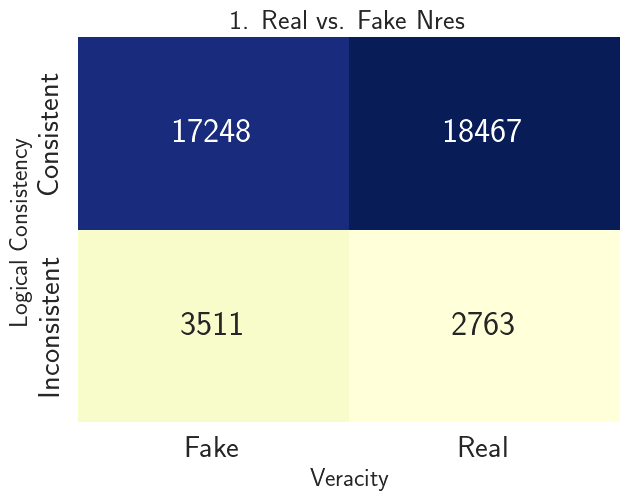

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping 'article_type' values
F3_Llama_2['ai_generated_label'] = F3_Llama_2['ai_generated_label'].replace({
    'real': 'Real',
    'fake': 'Fake'
})

# Create the confusion matrix (cross-tabulation)
conf_matrix = pd.crosstab(F3_Llama_2['Logical Consistency'], F3_Llama_2['ai_generated_label'])

# Plotting the confusion matrix using seaborn for the diagram
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False, annot_kws={"size": 25})
plt.title('1. Real vs. Fake Nres', fontsize=20)
plt.ylabel('Logical Consistency', fontsize=18)
plt.xlabel('Veracity', fontsize=18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()



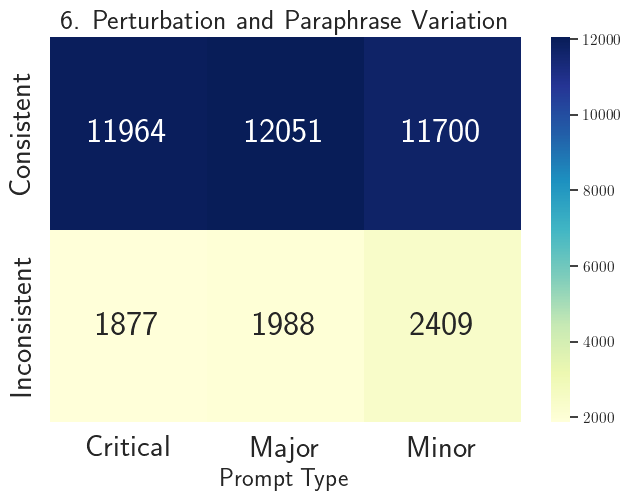

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping 'article_type' values
F3_Llama_2['Prompt_type'] = F3_Llama_2['Prompt_type'].replace({
    'minor': 'Minor',
    'major': 'Major',
    'critical': 'Critical'
})

# Create the confusion matrix (cross-tabulation)
conf_matrix = pd.crosstab(F3_Llama_2['Logical Consistency'], F3_Llama_2['Prompt_type'])

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(7.6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True, annot_kws={"size": 25})  # Increased font size with annot_kws
plt.title('6. Perturbation and Paraphrase Variation', fontsize=20)
plt.ylabel('')
plt.xlabel('Prompt Type', fontsize=18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()


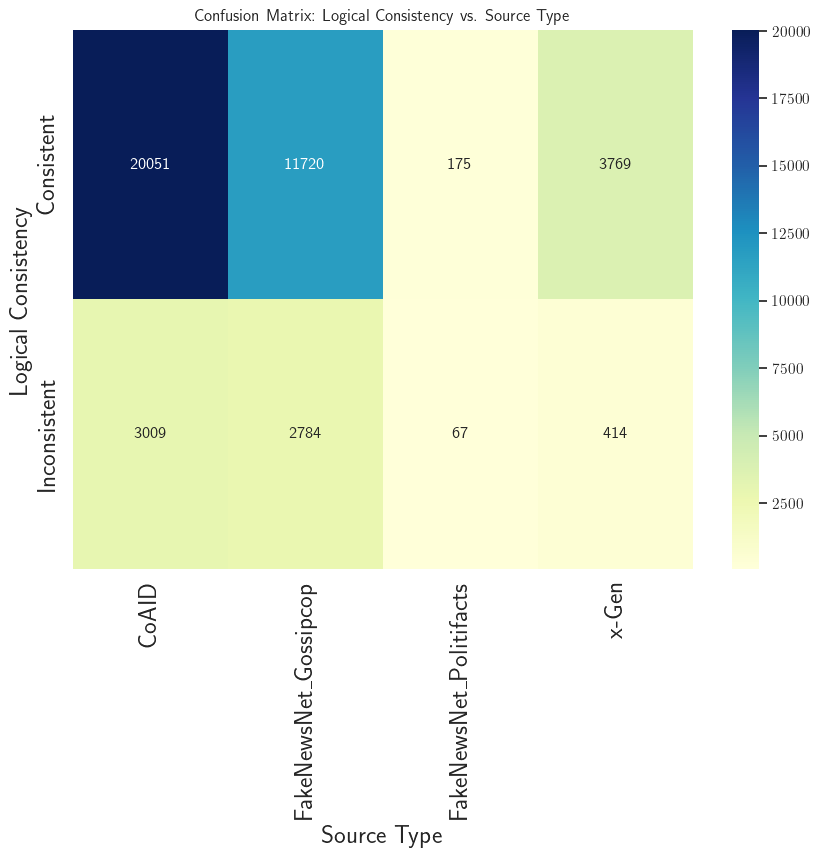

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix (cross-tabulation)
conf_matrix = pd.crosstab(F3_Llama_2['Logical Consistency'], F3_Llama_2['dataset_source'])

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title('Confusion Matrix: Logical Consistency vs. Source Type')
plt.ylabel('Logical Consistency', fontsize=18)
plt.xlabel('Source Type',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()


In [51]:
%ls

 AlignScore-large.ckpt                      F3_Dataset_visualization_plot
 AlignScore-large.ckpt.1                   'F3_Experiment Data'/
 DeBerta_v3NLI.ckpt                         F3_Human_Dataset.csv
'Experiment Data'/                          F3_Llama_2.csv
 F3_Consistency.csv                         F3_Llama_2_NER.csv
 F3_Dataset_PaLM2.csv                       F3_Llama_2_NER_DICT.csv
 F3_Dataset_Sanity.csv                      llama2_backup/
 F3_Dataset_Updated_AlignScore.csv          llama2_backup2/
 F3_Dataset_Updated.csv                     textbisson_backup/
 F3_Dataset_Updated_Semantic_Distance.csv   textbisson_backup2/
 F3_Dataset_Updated_Sentiment.csv           Untitled0.ipynb


In [52]:
# F3_Llama_2.to_csv("F3_Llama_2.csv", index= False)

## Factual

In [53]:
F3_Llama_2 = pd.read_csv('F3_Llama_2.csv', encoding='utf-8')
F3_Llama_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39655 entries, 0 to 39654
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uuid                         39655 non-null  object 
 1   human_content                39655 non-null  object 
 2   ai_content                   39655 non-null  object 
 3   model                        39655 non-null  object 
 4   num_completion_token         39655 non-null  int64  
 5   num_original_token           39655 non-null  int64  
 6   num_prompt_token             39655 non-null  int64  
 7   num_iagenerated_token        39655 non-null  int64  
 8   original_label               39655 non-null  object 
 9   source_type                  39655 non-null  object 
 10  ai_generated_label           39655 non-null  object 
 11  article_type                 39655 non-null  object 
 12  pre_post_GPT                 39655 non-null  object 
 13  dataset_source  

In [54]:
F3_Consistency = F3_Llama_2[F3_Llama_2['Logical Consistency'] == "consistent"]
F3_Consistency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34951 entries, 3 to 39654
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uuid                         34951 non-null  object 
 1   human_content                34951 non-null  object 
 2   ai_content                   34951 non-null  object 
 3   model                        34951 non-null  object 
 4   num_completion_token         34951 non-null  int64  
 5   num_original_token           34951 non-null  int64  
 6   num_prompt_token             34951 non-null  int64  
 7   num_iagenerated_token        34951 non-null  int64  
 8   original_label               34951 non-null  object 
 9   source_type                  34951 non-null  object 
 10  ai_generated_label           34951 non-null  object 
 11  article_type                 34951 non-null  object 
 12  pre_post_GPT                 34951 non-null  object 
 13  dataset_source  

In [55]:
F3_Consistency = F3_Consistency.rename(columns={'combined_hue': 'Prompt Veracity'})

In [56]:
# F3_Consistency = F3_Consistency.copy()  # Work on a copy
replace_values = {'minor_fake':'Minor Fake', 'major_fake':'Major Fake', 'critical_fake':'Critical Fake', 'minor_real':'Minor Real','major_real':'Major Real', 'critical_real':'Critical Real'}
F3_Consistency['Prompt Veracity'] = F3_Consistency['Prompt Veracity'].replace(replace_values)


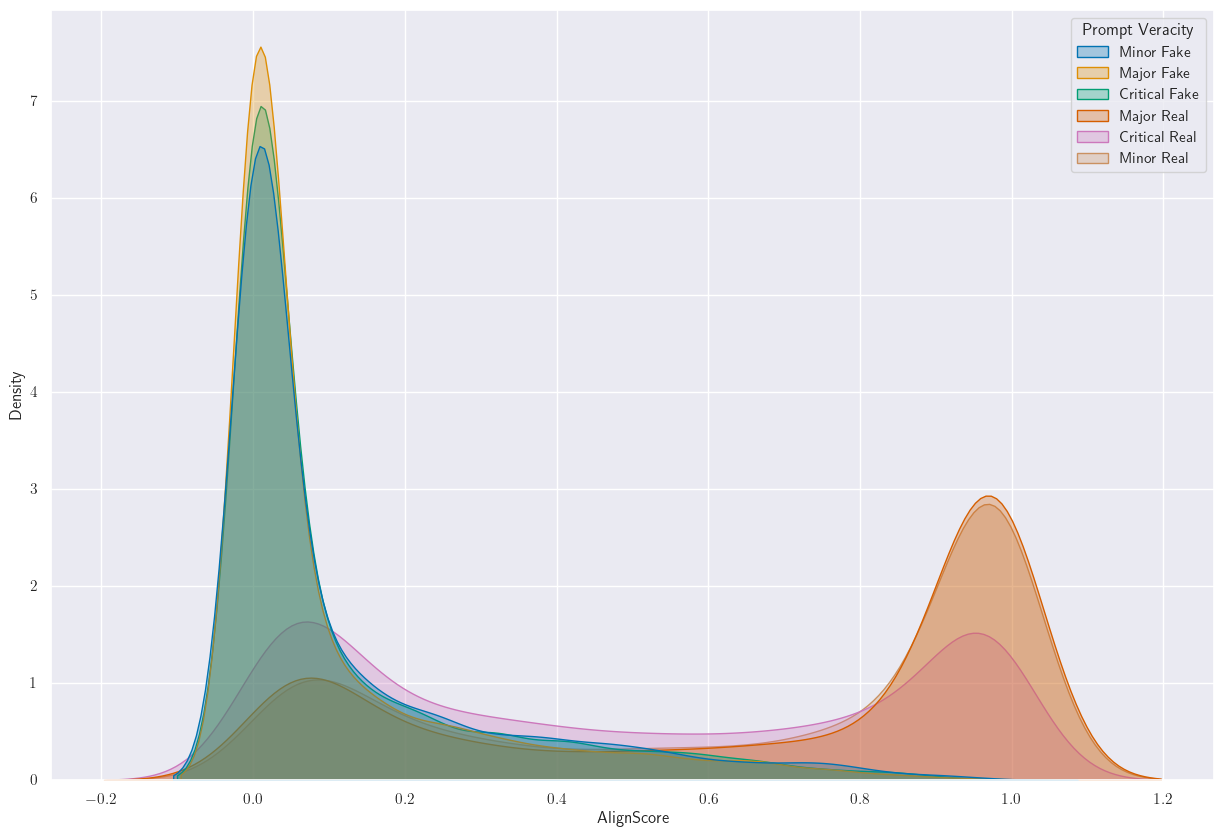

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(15, 10))  # You can adjust the numbers (10, 6) to your preferred size

sns.kdeplot(
   data=F3_Consistency, x="AlignScore", hue="Prompt Veracity",
   fill=True, common_norm=False, palette="colorblind",
   alpha=.3, linewidth=1,
)

plt.show()  # To display the plot

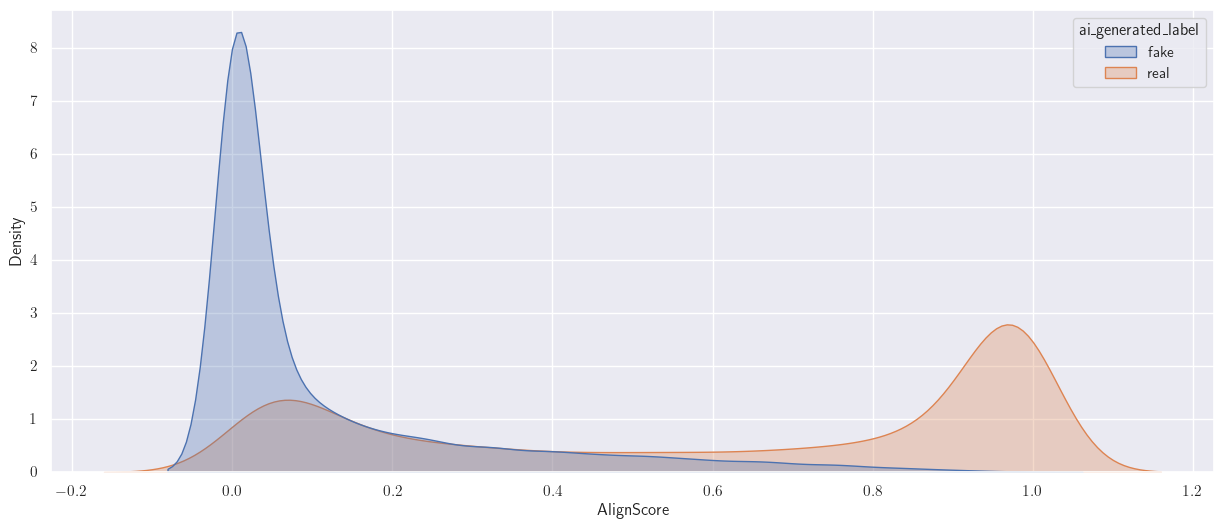

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(15, 6))  # You can adjust the numbers (10, 6) to your preferred size

sns.kdeplot(
   data=F3_Consistency, x="AlignScore", hue="ai_generated_label",
   fill=True, common_norm=False, palette=None,
   alpha=.3, linewidth=1,
)

plt.show()  # To display the plot

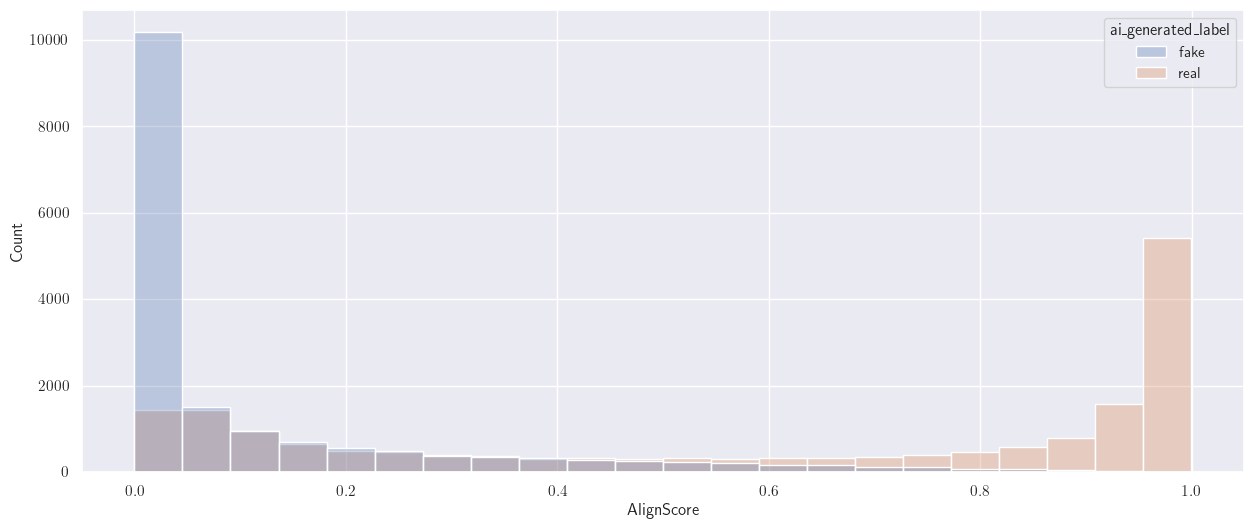

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(15, 6))  # You can adjust the numbers (10, 6) to your preferred size

sns.histplot(
   data=F3_Consistency, x="AlignScore", hue="ai_generated_label",
   fill=True, common_norm=False, palette=None,
   alpha=.3, linewidth=1,
)

plt.show()  # To display the plot

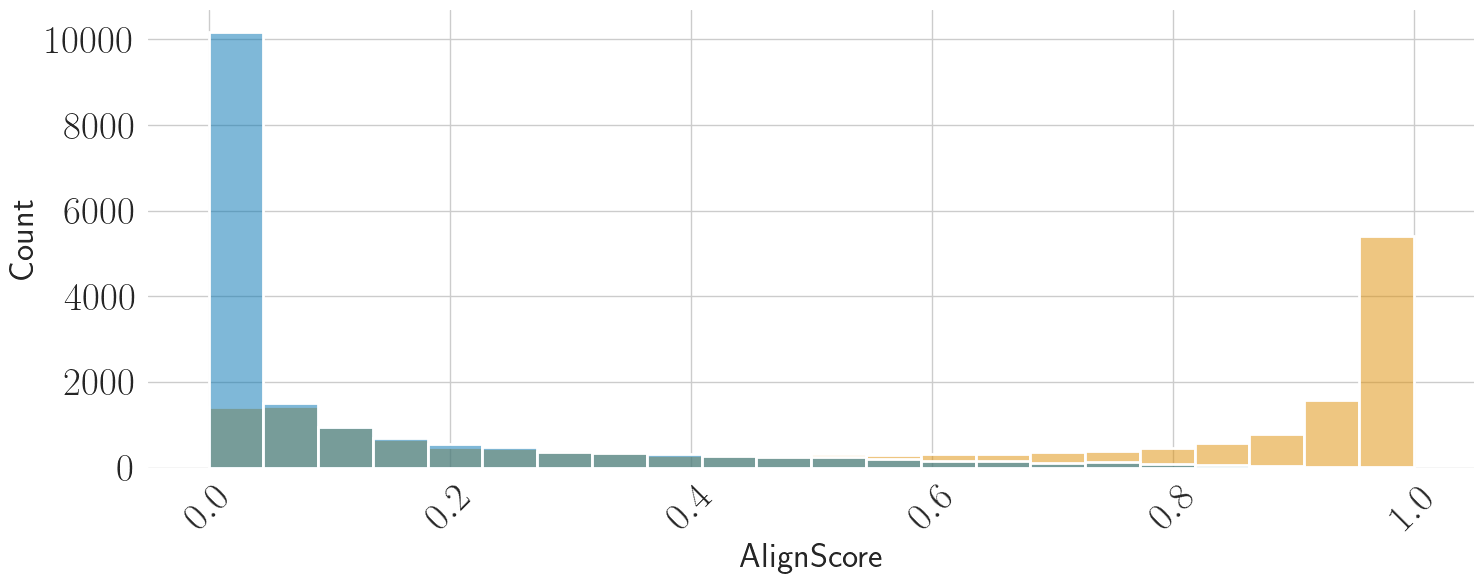

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure and white background
plt.figure(figsize=(15, 6))
sns.set_style("white")

# Plot the histogram
ax = sns.histplot(
    data=F3_Consistency, x="AlignScore", hue="ai_generated_label",
    fill=True, common_norm=False, palette="colorblind", legend=False,
    alpha=.5, linewidth=2
)

# plt.xlabel('AlignScore', fontsize=20)
# plt.ylabel('Count', fontsize=20)

# Increase the size of the numbers on the y and x axes
ax.tick_params(axis='both', labelsize=17)  # Adjust '14' to your desired font size

# Display only horizontal grid lines
ax.yaxis.grid(True)  # <-- This is the line that adds the horizontal grid
ax.xaxis.grid(True)  # <-- This is the line that adds the horizontal grid
# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Set the rotation of the x-axis tick labels
plt.xticks(rotation=45, fontsize=28)  # Change rotation to 45 degrees for inclination
plt.yticks(fontsize=28)
plt.xlabel('AlignScore', fontsize=25)
plt.ylabel('Count', fontsize=25)

# Adjust layout to fit legend
plt.tight_layout()

# Display the plot
plt.show()


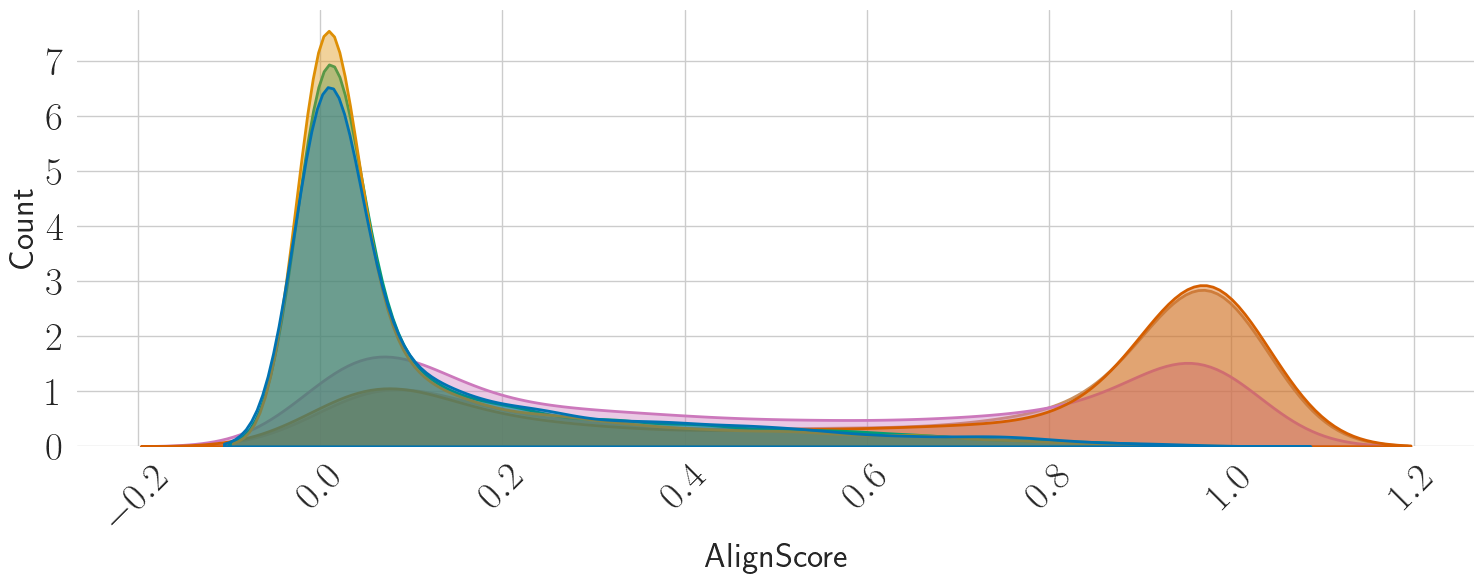

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure and white background
plt.figure(figsize=(15, 6))
sns.set_style("white")

# Define a color palette. Adjust the colors as per your requirements.
unique_veracity = F3_Consistency['Prompt Veracity'].unique()
# palette = dict(zip(unique_veracity, sns.color_palette("tab10", len(unique_veracity))))

# KDE plot
ax = sns.kdeplot(
    data=F3_Consistency, x="AlignScore", hue="Prompt Veracity",
    fill=True, common_norm=False, palette="colorblind",legend=False,
    alpha=.4, linewidth=2,
)

ax.tick_params(axis='both', labelsize=14)
# Set the title and labels
# plt.title('Distribution of AlignScore by Veracity', fontsize=18)
plt.xlabel('AlignScore', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Display legend at the bottom in a horizontal line
# plt.legend( labels= ['Minor Real','Critical Real', 'Major Real', 'Critical Fake','Major Fake','Minor Fake'],
#            fontsize='large', title_fontsize='20',
#            loc='upper center', bbox_to_anchor=(0.5, -0.2),
#            ncol=len(unique_veracity))


# Increase the size of the numbers on the y and x axes
ax.tick_params(axis='both', labelsize=17)  # Adjust '14' to your desired font size
# Show grid
ax.grid(True)

# Display only horizontal grid lines
ax.yaxis.grid(False)

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Display only horizontal grid lines
ax.yaxis.grid(True)  # <-- This is the line that adds the horizontal grid

# Show grid
ax.grid(True)

# Set the rotation of the x-axis tick labels
plt.xticks(rotation=45, fontsize=28)  # Change rotation to 45 degrees for inclination
plt.yticks(fontsize=28)
plt.xlabel('AlignScore', fontsize=25)
plt.ylabel('Count', fontsize=25)

# Adjust layout to fit legend
plt.tight_layout()

# Display the plot
plt.show()


In [62]:
F3_Consistency["AlignScore"].describe()


count    34951.000000
mean         0.366030
std          0.387184
min          0.000062
25%          0.018559
50%          0.170783
75%          0.794604
max          0.999598
Name: AlignScore, dtype: float64

In [63]:
# Filter F3_Consistency by ai_generated_label
filtered_data = F3_Consistency[F3_Consistency['ai_generated_label'] == "real"]

# Describe the AlignScore column for the filtered data
description = filtered_data["AlignScore"].describe()

print(description)


count    17870.000000
mean         0.604115
std          0.378304
min          0.000145
25%          0.182217
50%          0.757151
75%          0.968743
max          0.999598
Name: AlignScore, dtype: float64


In [64]:
# Filter F3_Consistency by ai_generated_label
filtered_data = F3_Consistency[F3_Consistency['ai_generated_label'] == "fake"]

# Describe the AlignScore column for the filtered data
description = filtered_data["AlignScore"].describe()

print(description)


count    17081.000000
mean         0.116946
std          0.188890
min          0.000062
25%          0.001455
50%          0.021538
75%          0.146963
max          0.981273
Name: AlignScore, dtype: float64


In [65]:
F3_Consistency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34951 entries, 3 to 39654
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uuid                         34951 non-null  object 
 1   human_content                34951 non-null  object 
 2   ai_content                   34951 non-null  object 
 3   model                        34951 non-null  object 
 4   num_completion_token         34951 non-null  int64  
 5   num_original_token           34951 non-null  int64  
 6   num_prompt_token             34951 non-null  int64  
 7   num_iagenerated_token        34951 non-null  int64  
 8   original_label               34951 non-null  object 
 9   source_type                  34951 non-null  object 
 10  ai_generated_label           34951 non-null  object 
 11  article_type                 34951 non-null  object 
 12  pre_post_GPT                 34951 non-null  object 
 13  dataset_source  

In [66]:
F3_Consistency.ai_generated_label.value_counts()

real    17870
fake    17081
Name: ai_generated_label, dtype: int64

In [67]:
import numpy as np
real_data = F3_Consistency[F3_Consistency['ai_generated_label'] == 'real']
fake_data = F3_Consistency[F3_Consistency['ai_generated_label'] == 'fake']

In [68]:
# For fake news
threshold_fake_percentile = np.percentile(fake_data['AlignScore'], 90)
threshold_fake_std = fake_data['AlignScore'].mean() + (fake_data['AlignScore'].std())

# Averaging the thresholds
fake_hybrid_threshold = np.mean([threshold_fake_percentile, threshold_fake_std])

print("Optimal Threshold based on hybrid method:", fake_hybrid_threshold)


Optimal Threshold based on hybrid method: 0.35784392352795635


In [69]:

# For real news
threshold_real_percentile = np.percentile(real_data['AlignScore'], 90)
threshold_real_std = real_data['AlignScore'].mean() - (real_data['AlignScore'].std())

# Averaging the thresholds
true_hybrid_threshold = np.mean([threshold_real_percentile, threshold_real_std])

print("Optimal Threshold based on hybrid method:", true_hybrid_threshold)


Optimal Threshold based on hybrid method: 0.6082093352986812


In [70]:
F3_Consistency['ai_generated_label'].value_counts()

real    17870
fake    17081
Name: ai_generated_label, dtype: int64

In [71]:
# Filter F3_Consistency by ai_generated_label
filtered_data = F3_Consistency[F3_Consistency['ai_generated_label'] == "real"]

# Describe the AlignScore column for the filtered data
description = filtered_data["AlignScore"].describe()

print(description)


count    17870.000000
mean         0.604115
std          0.378304
min          0.000145
25%          0.182217
50%          0.757151
75%          0.968743
max          0.999598
Name: AlignScore, dtype: float64


In [72]:
# Filter F3_Consistency by ai_generated_label
filtered_data = F3_Consistency[F3_Consistency['ai_generated_label'] == "fake"]

# Describe the AlignScore column for the filtered data
description = filtered_data["AlignScore"].describe()

print(description)

count    17081.000000
mean         0.116946
std          0.188890
min          0.000062
25%          0.001455
50%          0.021538
75%          0.146963
max          0.981273
Name: AlignScore, dtype: float64


### Establish Threshold

We leverage a hybrid statisticak approach using IRQ and SD to establish a treshold to capture edge cases

In [73]:
# Assume you have real_scores and fake_scores data
real_Q1 = np.percentile(real_data['AlignScore'], 25)
real_Q3 = np.percentile(real_data['AlignScore'], 75)
fake_Q1 = np.percentile(fake_data['AlignScore'], 25)
fake_Q3 = np.percentile(fake_data['AlignScore'], 75)

real_mean = np.mean(real_data['AlignScore'])
real_sd = np.std(real_data['AlignScore'])
fake_mean = np.mean(fake_data['AlignScore'])
fake_sd = np.std(fake_data['AlignScore'])

threshold_real = max(real_Q1, real_mean - real_sd)
threshold_fake = min(fake_Q3, fake_mean + fake_sd)

final_threshold = (threshold_real + threshold_fake) / 2

print(f"Optimal threshold based on IQR and SD: {final_threshold}")

Optimal threshold based on IQR and SD: 0.18639281005814984


In [74]:
# For fake news
threshold_fake_percentile = np.percentile(fake_data['AlignScore'], 90)
threshold_fake_std = fake_data['AlignScore'].mean() + (fake_data['AlignScore'].std())

# Averaging the thresholds
hybrid_threshold_fake = np.mean([threshold_fake_percentile, threshold_fake_std])
print("Optimal Threshold for fake news based on hybrid method:", hybrid_threshold_fake)

# For real news
threshold_real_percentile = np.percentile(real_data['AlignScore'], 90)
threshold_real_std = real_data['AlignScore'].mean() - (real_data['AlignScore'].std())

# Averaging the thresholds
hybrid_threshold_real = np.mean([threshold_real_percentile, threshold_real_std])
print("Optimal Threshold for real news based on hybrid method:", hybrid_threshold_real)


Optimal Threshold for fake news based on hybrid method: 0.35784392352795635
Optimal Threshold for real news based on hybrid method: 0.6082093352986812


In [75]:
# For fake news
Q1_fake = np.percentile(fake_data['AlignScore'], 25)
Q3_fake = np.percentile(fake_data['AlignScore'], 75)
IQR_fake = Q3_fake - Q1_fake

# For real news
Q1_real = np.percentile(real_data['AlignScore'], 25)
Q3_real = np.percentile(real_data['AlignScore'], 75)
IQR_real = Q3_real - Q1_real



# For fake news
threshold_fake_percentile = np.percentile(fake_data['AlignScore'], 90)
threshold_fake_std = IQR_fake + (fake_data['AlignScore'].std())

# Averaging the thresholdsIQR_fake
hybrid_threshold_fake = np.mean([threshold_fake_percentile, threshold_fake_std])
print("Optimal Threshold for fake news based on hybrid method:", hybrid_threshold_fake)

# For real news
threshold_real_percentile = np.percentile(real_data['AlignScore'], 90)
threshold_real_std = IQR_real - (real_data['AlignScore'].std())

# Averaging the thresholds
hybrid_threshold_real = np.mean([threshold_real_percentile, threshold_real_std])
print("Optimal Threshold for real news based on hybrid method:", hybrid_threshold_real)


Optimal Threshold for fake news based on hybrid method: 0.3721249341367471
Optimal Threshold for real news based on hybrid method: 0.6994142905570809


In [76]:
# For fake news
Q1_fake = np.percentile(fake_data['AlignScore'], 25)
Q3_fake = np.percentile(fake_data['AlignScore'], 75)
IQR_fake = Q3_fake - Q1_fake

lower_bound_fake = Q1_fake - 1.5 * IQR_fake
upper_bound_fake = np.percentile(fake_data['AlignScore'], 90)

print(f"Fake news threshold range: {lower_bound_fake} to {upper_bound_fake}")

# For real news
Q1_real = np.percentile(real_data['AlignScore'], 25)
Q3_real = np.percentile(real_data['AlignScore'], 75)
IQR_real = Q3_real - Q1_real

lower_bound_real = np.percentile(real_data['AlignScore'], 10)
upper_bound_real = Q3_real + 1.5 * IQR_real

print(f"Real news threshold range: {lower_bound_real} to {upper_bound_real}")


Fake news threshold range: -0.2168071985943243 to 0.4098516702651977
Real news threshold range: 0.05601284615695469 to 2.1485303342342377


In [77]:
# For fake news
Q1_fake = np.percentile(fake_data['AlignScore'], 25)
Q3_fake = np.percentile(fake_data['AlignScore'], 75)
IQR_fake = Q3_fake - Q1_fake

# Instead of using 1.5*IQR for the lower bound, we're directly using the 10th percentile
lower_bound_fake = Q1_fake - 1.5 * IQR_fake
upper_bound_fake = np.percentile(fake_data['AlignScore'], 90)  # Using 90th percentile

print(f"Fake news threshold range: {lower_bound_fake} to {upper_bound_fake}")

# For real news
Q1_real = np.percentile(real_data['AlignScore'], 25)
Q3_real = np.percentile(real_data['AlignScore'], 75)
IQR_real = Q3_real - Q1_real

# Instead of using Q1 - 1.5*IQR, we're directly using the 10th percentile for real news
lower_bound_real = np.percentile(real_data['AlignScore'], 10)
upper_bound_real = Q3_real + 1.5 * IQR_real  # Retaining the upper bound

print(f"Real news threshold range: {lower_bound_real} to {upper_bound_real}")


Fake news threshold range: -0.2168071985943243 to 0.4098516702651977
Real news threshold range: 0.05601284615695469 to 2.1485303342342377


In [78]:
import numpy as np

def classify_factual_consistency(df):
    # Classify based on AlignScore and ai_generated_label
    conditions = [
        (df['AlignScore'] <= 0.35784392352795635) & (df['ai_generated_label'] == 'fake'),
        (df['AlignScore'] >= 0.6082093352986812) & (df['ai_generated_label'] == 'real')
    ]
    choices = ['consistent', 'consistent']

    # Create new column with the results
    df['factual_consistency'] = np.select(conditions, choices, default="inconsistent")
    return df

# Apply the function
F3_Consistency = classify_factual_consistency(F3_Llama_2)


In [79]:
F3_Consistency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39655 entries, 0 to 39654
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uuid                         39655 non-null  object 
 1   human_content                39655 non-null  object 
 2   ai_content                   39655 non-null  object 
 3   model                        39655 non-null  object 
 4   num_completion_token         39655 non-null  int64  
 5   num_original_token           39655 non-null  int64  
 6   num_prompt_token             39655 non-null  int64  
 7   num_iagenerated_token        39655 non-null  int64  
 8   original_label               39655 non-null  object 
 9   source_type                  39655 non-null  object 
 10  ai_generated_label           39655 non-null  object 
 11  article_type                 39655 non-null  object 
 12  pre_post_GPT                 39655 non-null  object 
 13  dataset_source  

In [80]:
F3_Consistency.factual_consistency.value_counts()


consistent      27667
inconsistent    11988
Name: factual_consistency, dtype: int64

In [81]:
# Counting the value based on ai_generated_label
count = F3_Consistency.groupby('ai_generated_label')['factual_consistency'].value_counts()

print(count)


ai_generated_label  factual_consistency
fake                consistent             16915
                    inconsistent            3281
real                consistent             10752
                    inconsistent            8707
Name: factual_consistency, dtype: int64


In [82]:
# Counting the value based on ai_generated_label
count = F3_Consistency.groupby('Prompt_type')['factual_consistency'].value_counts()

print(count)


Prompt_type  factual_consistency
critical     consistent             8293
             inconsistent           4933
major        consistent             9842
             inconsistent           3358
minor        consistent             9532
             inconsistent           3697
Name: factual_consistency, dtype: int64


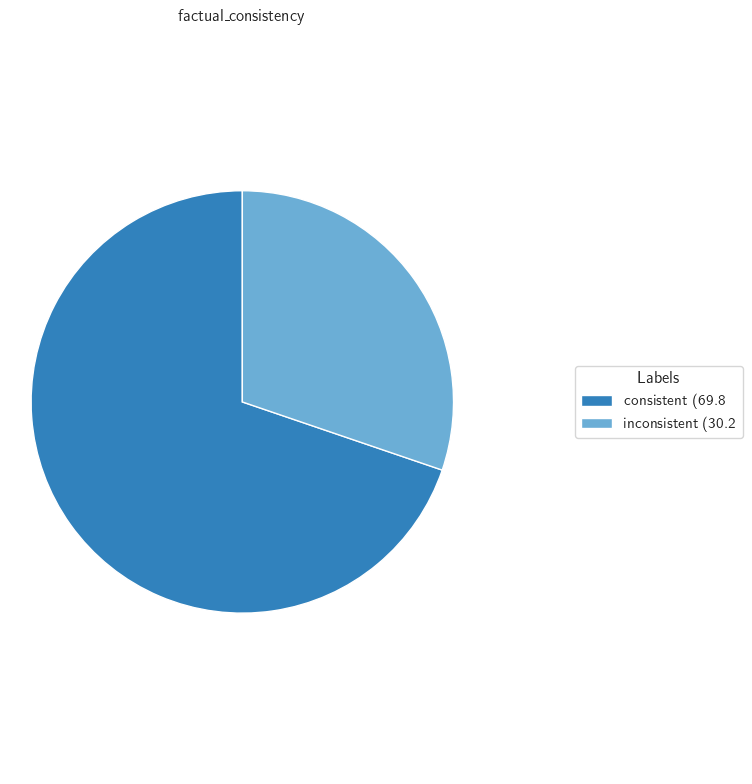

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pie_for_column(ax, df, column_name, colormap):
    # Extract sizes and labels for the given column
    sizes = df[column_name].value_counts().values
    labels = df[column_name].value_counts().index

    # Calculate percentages for the legend
    total = np.sum(sizes)
    percentages = [f"{label} ({size/total:.1%})" for label, size in zip(labels, sizes)]

    # Use the colormap to get consistent colors for the labels
    colors = [colormap[label] for label in labels]

    # Plot pie chart
    wedges = ax.pie(sizes, colors=colors, startangle=90)[0]

    # Adjust axis and add legend
    ax.axis('equal')
    ax.legend(wedges, percentages, title="Labels", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1))

    # Set title centered above the pie chart
    ax.set_title(column_name, position=(0.5, 1.05))

# Extract unique labels for the 'Logical Consistency' column
all_labels = F3_Consistency['factual_consistency'].dropna().unique()

# Assign unique colors from a colormap to each label
colormap = {label: color for label, color in zip(all_labels, plt.cm.tab20c.colors)}

# Create a figure
fig, ax = plt.subplots(figsize=(8, 8))

# Plot 'Logical Consistency' column
plot_pie_for_column(ax, F3_Consistency, 'factual_consistency', colormap)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


### Remove Factual Inconsistency

In [84]:
F3_Consistency = F3_Consistency[F3_Consistency['factual_consistency']!= 'inconsistent']

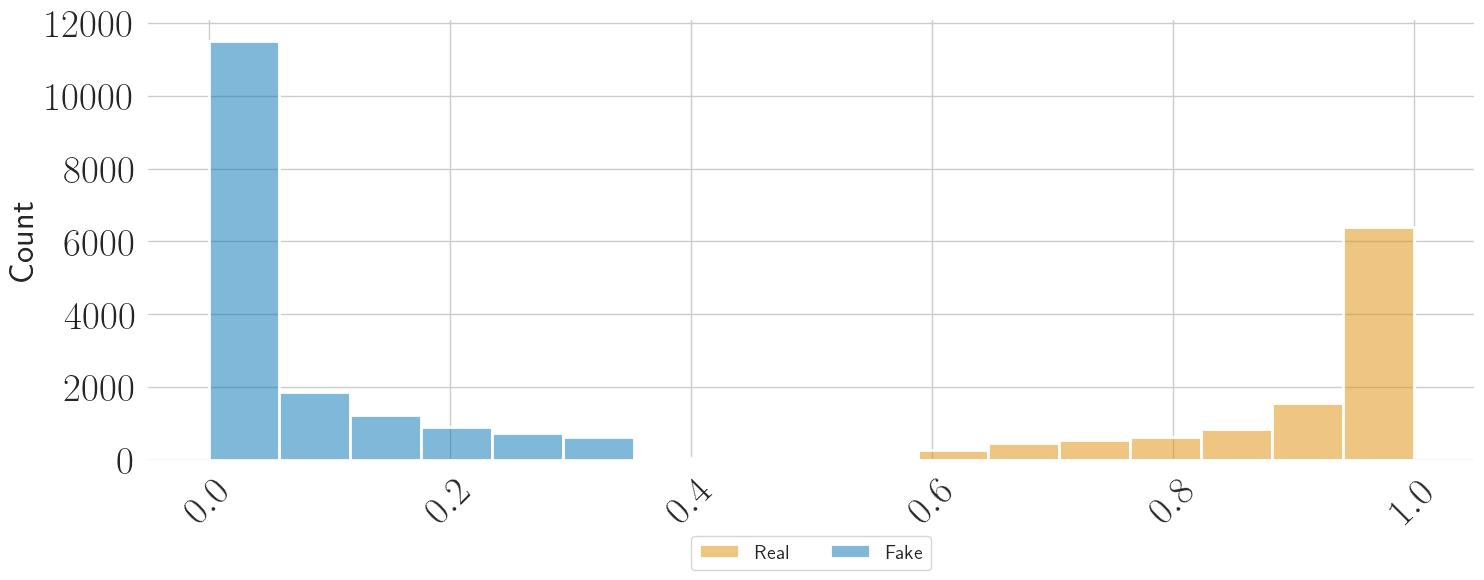

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure and white background
plt.figure(figsize=(15, 6))
sns.set_style("white")

# Plot the histogram
ax = sns.histplot(
    data=F3_Consistency, x="AlignScore", hue="ai_generated_label",
    fill=True, common_norm=False, palette="colorblind",
    alpha=.5, linewidth=2
)

# Set the title and labels
plt.xlabel('AlignScore', fontsize=20)
plt.ylabel('Count', fontsize=20)

# Display legend at the bottom in a horizontal line
plt.legend( labels=['Real', 'Fake'],
           fontsize='large', title_fontsize='20',
           loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=2)  # We set ncol=2 since there are two labels: 'Real' and 'Fake'


# Increase the size of the numbers on the y and x axes
ax.tick_params(axis='both', labelsize=17)  # Adjust '14' to your desired font size

# Show grid
ax.grid(True)

# Display only horizontal grid lines
ax.yaxis.grid(False)

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Display only horizontal grid lines
ax.yaxis.grid(True)  # <-- This is the line that adds the horizontal grid

# Set the rotation of the x-axis tick labels
plt.xticks(rotation=45, fontsize=28)  # Change rotation to 45 degrees for inclination
plt.yticks(fontsize=28)
plt.xlabel('', fontsize=25)
plt.ylabel('Count', fontsize=25)

# Adjust layout to fit legend
plt.tight_layout()

# Display the plot
plt.show()


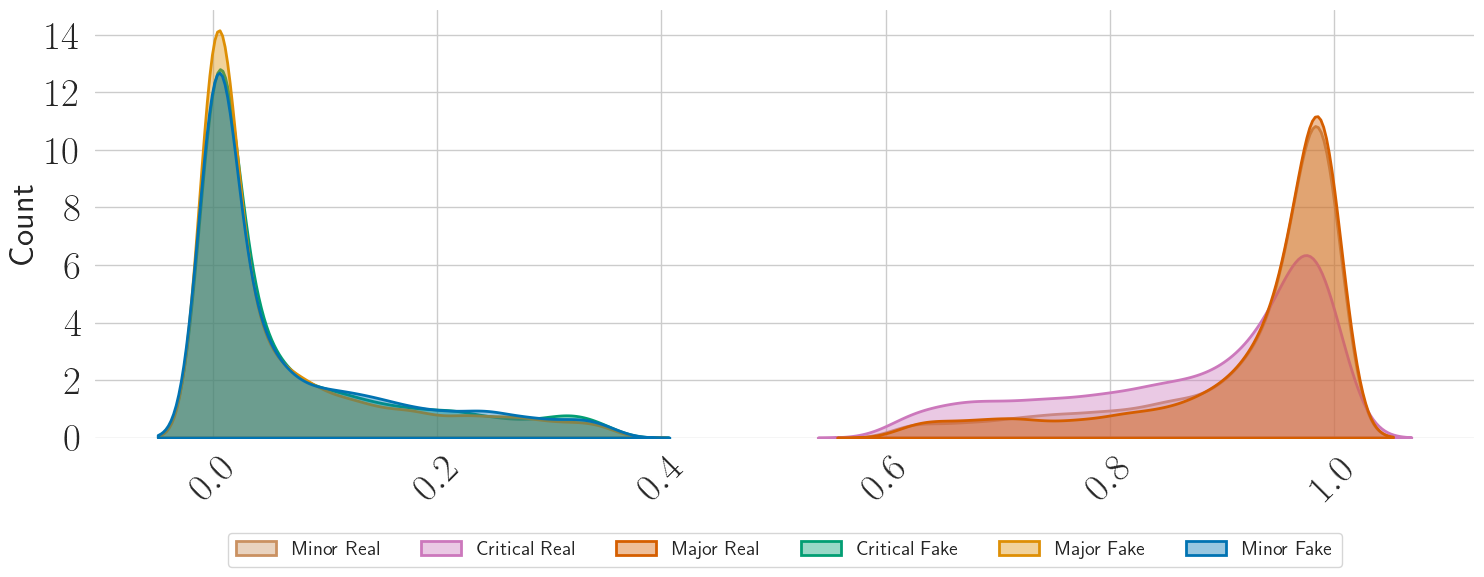

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure and white background
plt.figure(figsize=(15, 6))
sns.set_style("white")

# Define a color palette. Adjust the colors as per your requirements.
unique_veracity = F3_Consistency['combined_hue'].unique()
# palette = dict(zip(unique_veracity, sns.color_palette("tab10", len(unique_veracity))))

# KDE plot
ax = sns.kdeplot(
    data=F3_Consistency, x="AlignScore", hue="combined_hue",
    fill=True, common_norm=False, palette="colorblind",
    alpha=.4, linewidth=2,
)

# Set the title and labels
# plt.title('Distribution of AlignScore by Veracity', fontsize=18)
plt.xlabel('AlignScore', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Display legend at the bottom in a horizontal line
plt.legend( labels= ['Minor Real','Critical Real', 'Major Real', 'Critical Fake','Major Fake','Minor Fake'],
           fontsize='large', title_fontsize='20',
           loc='upper center', bbox_to_anchor=(0.5, -0.2),
           ncol=len(unique_veracity))


# Increase the size of the numbers on the y and x axes
ax.tick_params(axis='both', labelsize=17)  # Adjust '14' to your desired font size

# Show grid
ax.grid(True)

# Display only horizontal grid lines
ax.yaxis.grid(False)

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Display only horizontal grid lines
ax.yaxis.grid(True)  # <-- This is the line that adds the horizontal grid

# Set the rotation of the x-axis tick labels
plt.xticks(rotation=45, fontsize=28)  # Change rotation to 45 degrees for inclination
plt.yticks(fontsize=28)
plt.xlabel('', fontsize=25)
plt.ylabel('Count', fontsize=25)

# Adjust layout to fit legend
plt.tight_layout()

# Display the plot
plt.show()


## Contextual

In [87]:
F3_Consistency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27667 entries, 0 to 39645
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uuid                         27667 non-null  object 
 1   human_content                27667 non-null  object 
 2   ai_content                   27667 non-null  object 
 3   model                        27667 non-null  object 
 4   num_completion_token         27667 non-null  int64  
 5   num_original_token           27667 non-null  int64  
 6   num_prompt_token             27667 non-null  int64  
 7   num_iagenerated_token        27667 non-null  int64  
 8   original_label               27667 non-null  object 
 9   source_type                  27667 non-null  object 
 10  ai_generated_label           27667 non-null  object 
 11  article_type                 27667 non-null  object 
 12  pre_post_GPT                 27667 non-null  object 
 13  dataset_source  

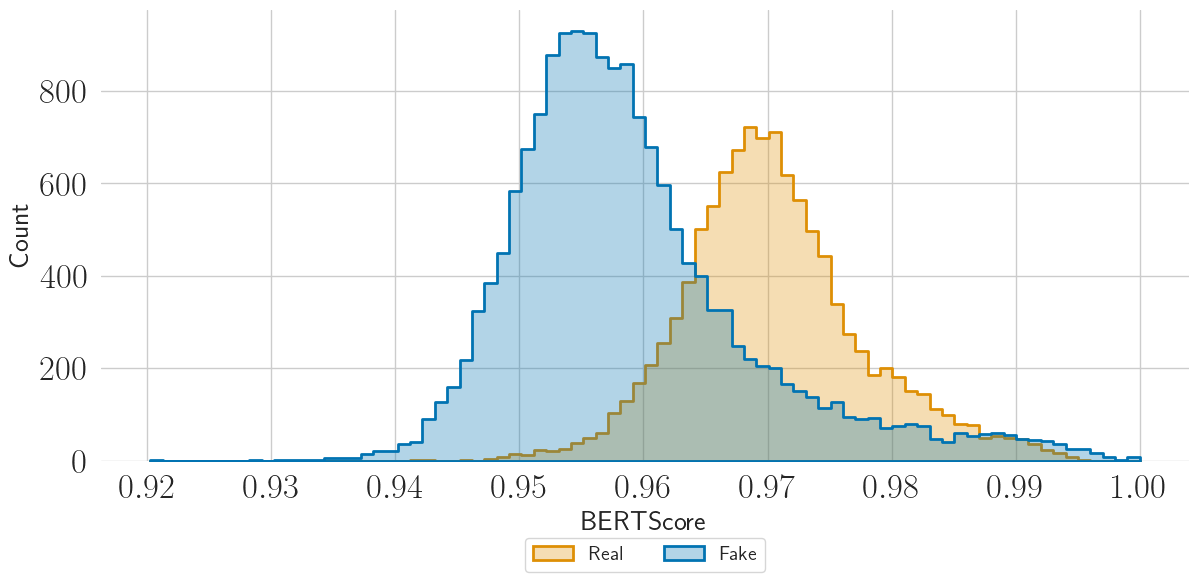

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure and white background
plt.figure(figsize=(12, 6))
sns.set_style("white")

# Plot the histogram
ax = sns.histplot(
    data=F3_Consistency, x="BERTScore", hue="ai_generated_label",
    fill=True, element="step",  common_norm=False, palette="colorblind",
    alpha=.3, linewidth=2
)

# Set the title and labels
plt.xlabel('BERTScore', fontsize=20)
plt.ylabel('Count', fontsize=20)

# Display legend at the bottom in a horizontal line
plt.legend( labels=['Real', 'Fake'],
           fontsize='large', title_fontsize='20',
           loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=2)  # We set ncol=2 since there are two labels: 'Real' and 'Fake'


# Increase the size of the numbers on the y and x axes
ax.tick_params(axis='both', labelsize=17)  # Adjust '14' to your desired font size

# Show grid
ax.grid(True)

# Display only horizontal grid lines
# ax.yaxis.grid(False)

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)



# Adjust layout to fit legend
plt.tight_layout()

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Display the plot
plt.show()


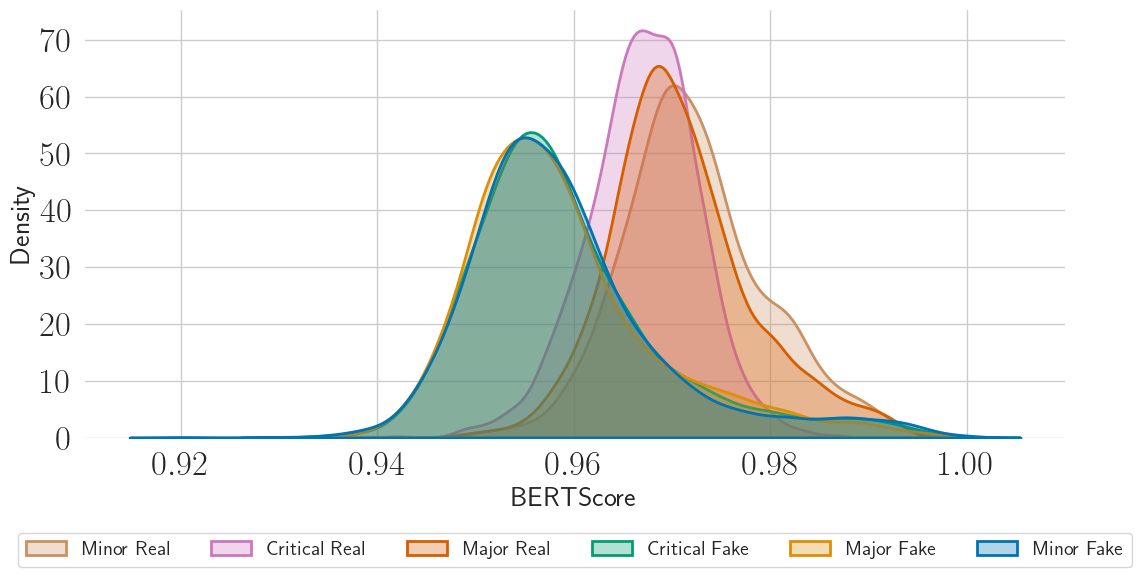

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure and white background
plt.figure(figsize=(12, 6))
sns.set_style("white")

# Define a color palette. Adjust the colors as per your requirements.
unique_veracity = F3_Consistency['combined_hue'].unique()
# palette = dict(zip(unique_veracity, sns.color_palette("tab10", len(unique_veracity))))

# KDE plot
ax = sns.kdeplot(
    data=F3_Consistency, x="BERTScore", hue="combined_hue",
    fill=True, common_norm=False, palette="colorblind",
    alpha=.3, linewidth=2,
)

# Set the title and labels
# plt.title('Distribution of AlignScore by Veracity', fontsize=18)
plt.xlabel('BERTScore', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Display legend at the bottom in a horizontal line
plt.legend( labels= ['Minor Real','Critical Real', 'Major Real', 'Critical Fake','Major Fake','Minor Fake'],
           fontsize='large', title_fontsize='20',
           loc='upper center', bbox_to_anchor=(0.5, -0.2),
           ncol=len(unique_veracity))


# Increase the size of the numbers on the y and x axes
ax.tick_params(axis='both', labelsize=17)  # Adjust '14' to your desired font size

# Show grid
ax.grid(True)

# Display only horizontal grid lines
# ax.yaxis.grid(False)

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust layout to fit legend
plt.tight_layout()

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Display the plot
plt.show()


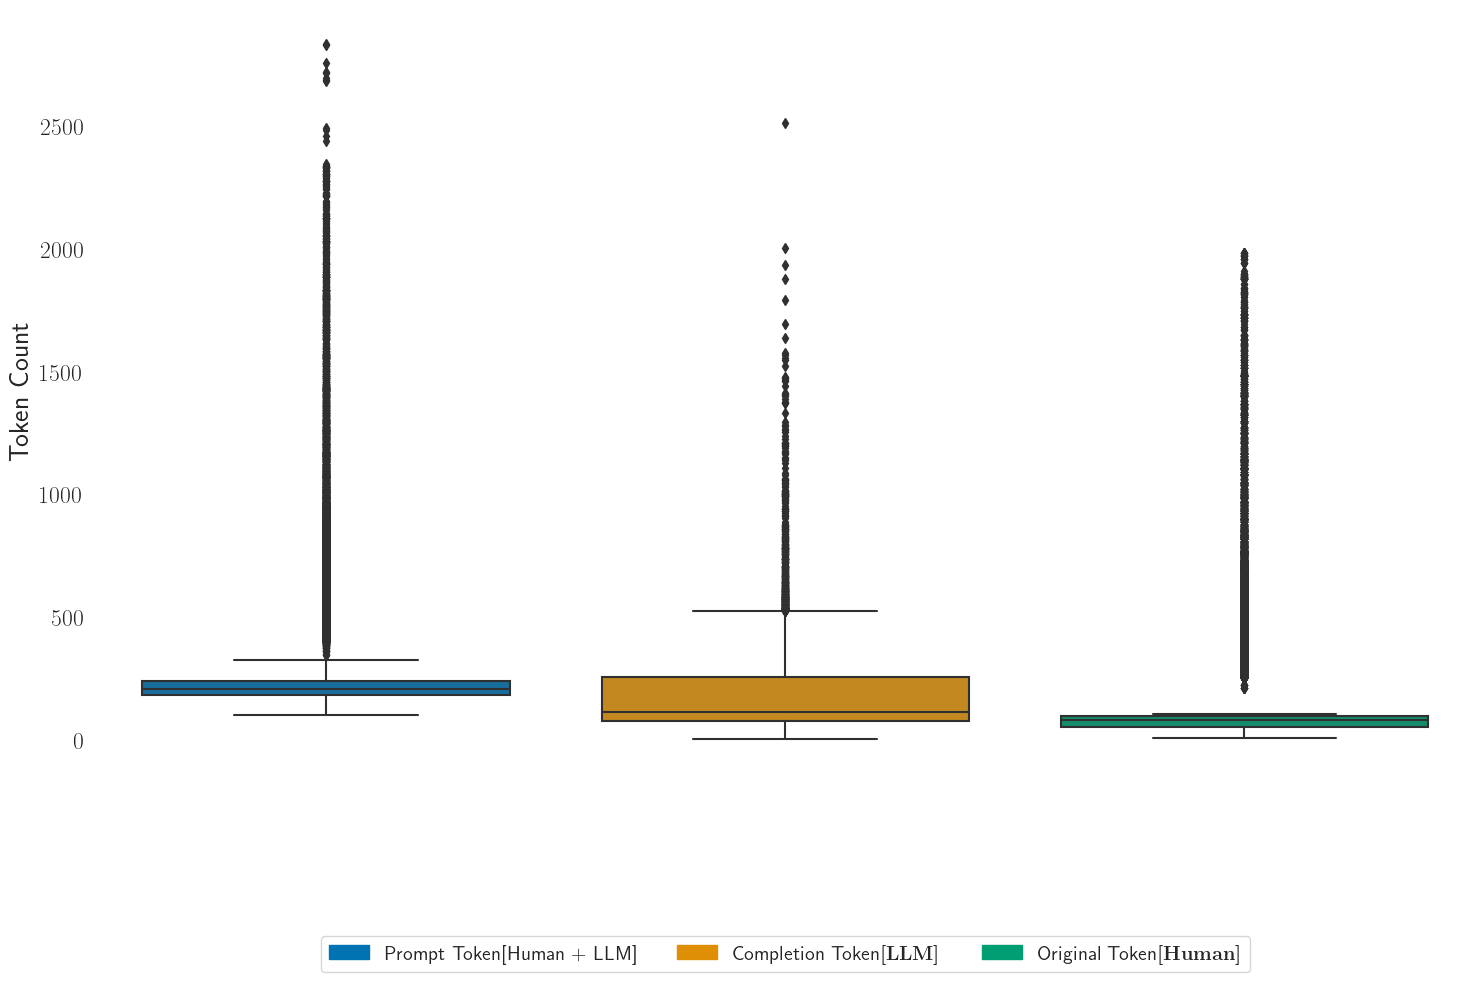

In [90]:
# Sample data
df = F3_Consistency[['num_prompt_token', 'num_completion_token', 'num_original_token']]

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Activate the LaTeX text interpreter
plt.rc('text', usetex=True)

# Set the size of the figure and white background
plt.figure(figsize=(15, 10))
sns.set_style("white")

# Create a boxplot
ax = sns.boxplot(data=df, palette="colorblind")

# Remove default x-axis labels
ax.set_xticklabels([])

# Set y-axis label and font size
ax.set_ylabel('Token Count', fontsize=20)

# Customize ticks and labels
ax.tick_params(axis='y', labelsize=17)

# Create custom legend
patch1 = mpatches.Patch(color=sns.color_palette("colorblind")[0], label='Prompt Token')
patch2 = mpatches.Patch(color=sns.color_palette("colorblind")[1], label=r'Completion Token{\bf{[LLM]}}')
patch3 = mpatches.Patch(color=sns.color_palette("colorblind")[2], label=r'Original Token{\bf{[Human]}}')

ax.legend([patch1, patch2, patch3],
          ['Prompt Token[Human + LLM]', r'Completion Token{\bf{[LLM]}}', r'Original Token{\bf{[Human]}}'],
          fontsize='large', title_fontsize='20', loc='upper center',
          bbox_to_anchor=(0.5, -0.2), ncol=3)

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust layout to fit legend
plt.tight_layout()

# Display the plot
plt.show()


## Semantic

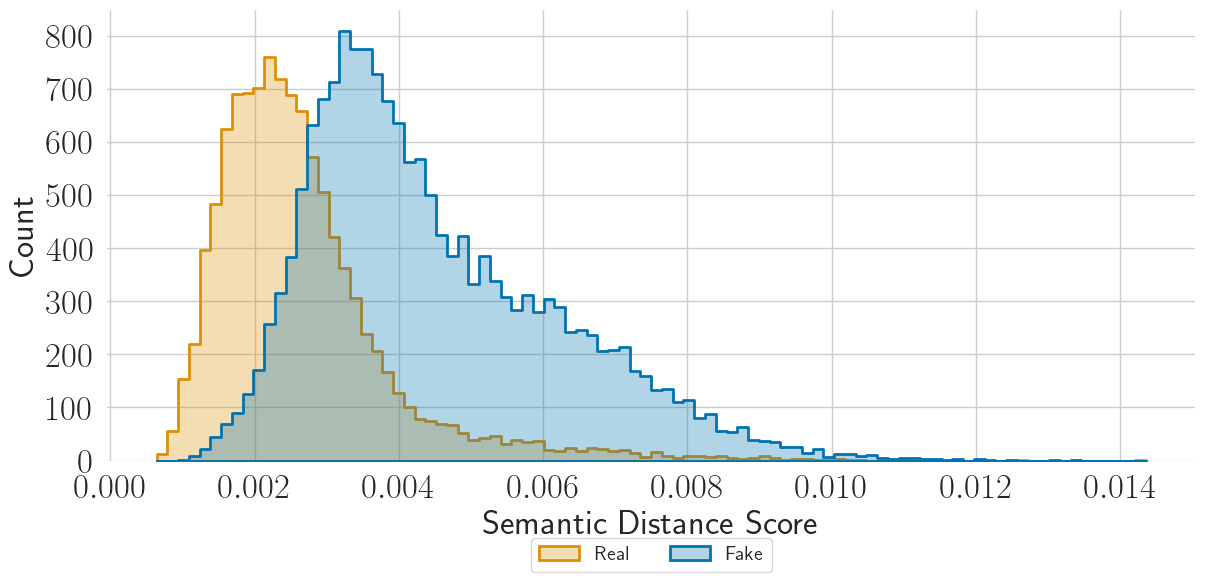

'\nLow Semantic Distance Score: Indicates that the two texts are semantically similar or close in meaning.\nHigh Semantic Distance Score: Suggests that the two texts are semantically different or distant in meaning.\n\n'

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure and white background
plt.figure(figsize=(12, 6))
sns.set_style("white")

# Plot the histogram
ax = sns.histplot(
    data=F3_Consistency, x="semantic_distance", hue="ai_generated_label",
    fill=True, element="step",  common_norm=False, palette="colorblind",
    alpha=.3, linewidth=2
)

# Set the title and labels
plt.xlabel('semantic_distance', fontsize=20)
plt.ylabel('Count', fontsize=20)

# Display legend at the bottom in a horizontal line
plt.legend( labels=['Real', 'Fake'],
           fontsize='large', title_fontsize='20',
           loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=2)  # We set ncol=2 since there are two labels: 'Real' and 'Fake'


# Increase the size of the numbers on the y and x axes
ax.tick_params(axis='both', labelsize=17)  # Adjust '14' to your desired font size

# Show grid
ax.grid(False)

# Display only horizontal grid lines
ax.yaxis.grid(False)

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust layout to fit legend
plt.tight_layout()
plt.ylabel('Count', fontsize=25)
plt.xlabel('Semantic Distance Score', fontsize=25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)



# Show grid
ax.grid(True)



# Display the plot
plt.show()

"""
Low Semantic Distance Score: Indicates that the two texts are semantically similar or close in meaning.
High Semantic Distance Score: Suggests that the two texts are semantically different or distant in meaning.

"""


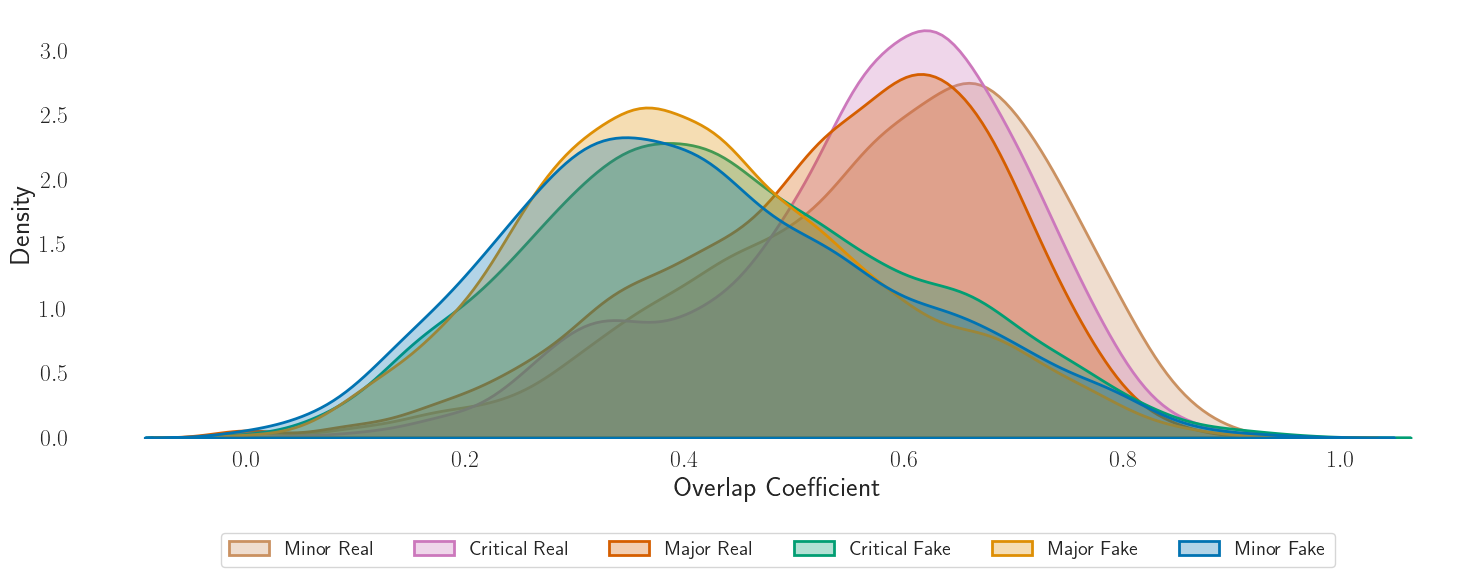

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure and white background
plt.figure(figsize=(15, 6))
sns.set_style("white")

# Define a color palette. Adjust the colors as per your requirements.
unique_veracity = F3_Consistency['combined_hue'].unique()
# palette = dict(zip(unique_veracity, sns.color_palette("tab10", len(unique_veracity))))

# KDE plot
ax = sns.kdeplot(
    data=F3_Consistency, x="overlap_coefficient", hue="combined_hue",
    fill=True, common_norm=False, palette="colorblind",
    alpha=.3, linewidth=2,
)

# Set the title and labels
# plt.title('Distribution of AlignScore by Veracity', fontsize=18)
plt.xlabel('Overlap Coefficient', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Display legend at the bottom in a horizontal line
plt.legend( labels= ['Minor Real','Critical Real', 'Major Real', 'Critical Fake','Major Fake','Minor Fake'],
           fontsize='large', title_fontsize='20',
           loc='upper center', bbox_to_anchor=(0.5, -0.2),
           ncol=len(unique_veracity))


# Increase the size of the numbers on the y and x axes
ax.tick_params(axis='both', labelsize=17)  # Adjust '14' to your desired font size

# Show grid
ax.grid(False)

# Display only horizontal grid lines
ax.yaxis.grid(False)

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust layout to fit legend
plt.tight_layout()

# Display the plot
plt.show()


In [93]:
# F3_Consistency.to_csv('F3_Consistency.csv', index=False)

In [94]:
# import mauve

# def calculate_mauve(p_text, q_text):
#     out = mauve.compute_mauve(p_text=p_text, q_text=q_text, device_id=0, max_text_length=2048, verbose=True)
#     return out.mauve

# # Apply the function to your dataframe
# F3_Consistency['mauveScore'] = F3_Consistency.apply(lambda row: calculate_mauve([row['ai_content']], [row['human_content']]), axis=1)


In [95]:
# F3_Consistency.to_csv('F3_Consistency.csv', index=False)

In [96]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set the size of the figure and white background
# plt.figure(figsize=(15, 6))
# sns.set_style("white")

# # Plot the histogram
# ax = sns.histplot(
#     data=F3_Consistency, x="mauveScore", hue="ai_generated_label",
#     fill=True, element="step",  common_norm=False, palette="colorblind",
#     alpha=.3, linewidth=2
# )

# # Set the title and labels
# plt.xlabel('semantic_distance', fontsize=20)
# plt.ylabel('Count', fontsize=20)

# # Display legend at the bottom in a horizontal line
# plt.legend( labels=['Real', 'Fake'],
#            fontsize='large', title_fontsize='20',
#            loc='upper center', bbox_to_anchor=(0.5, -0.15),
#            ncol=2)  # We set ncol=2 since there are two labels: 'Real' and 'Fake'


# # Increase the size of the numbers on the y and x axes
# ax.tick_params(axis='both', labelsize=17)  # Adjust '14' to your desired font size

# # Show grid
# ax.grid(False)

# # Display only horizontal grid lines
# ax.yaxis.grid(False)

# # Remove borders
# for spine in ax.spines.values():
#     spine.set_visible(False)

# # Adjust layout to fit legend
# plt.tight_layout()

# # Display the plot
# plt.show()

# """
# Low Semantic Distance Score: Indicates that the two texts are semantically similar or close in meaning.
# High Semantic Distance Score: Suggests that the two texts are semantically different or distant in meaning.

# """


In [97]:
F3_Consistency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27667 entries, 0 to 39645
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uuid                         27667 non-null  object 
 1   human_content                27667 non-null  object 
 2   ai_content                   27667 non-null  object 
 3   model                        27667 non-null  object 
 4   num_completion_token         27667 non-null  int64  
 5   num_original_token           27667 non-null  int64  
 6   num_prompt_token             27667 non-null  int64  
 7   num_iagenerated_token        27667 non-null  int64  
 8   original_label               27667 non-null  object 
 9   source_type                  27667 non-null  object 
 10  ai_generated_label           27667 non-null  object 
 11  article_type                 27667 non-null  object 
 12  pre_post_GPT                 27667 non-null  object 
 13  dataset_source  

In [98]:
# F3_Consistency.to_csv('F3_Consistency.csv', index=False)


# Train Test Split

In [99]:
%ls

 AlignScore-large.ckpt                      F3_Dataset_visualization_plot
 AlignScore-large.ckpt.1                   'F3_Experiment Data'/
 DeBerta_v3NLI.ckpt                         F3_Human_Dataset.csv
'Experiment Data'/                          F3_Llama_2.csv
 F3_Consistency.csv                         F3_Llama_2_NER.csv
 F3_Dataset_PaLM2.csv                       F3_Llama_2_NER_DICT.csv
 F3_Dataset_Sanity.csv                      llama2_backup/
 F3_Dataset_Updated_AlignScore.csv          llama2_backup2/
 F3_Dataset_Updated.csv                     textbisson_backup/
 F3_Dataset_Updated_Semantic_Distance.csv   textbisson_backup2/
 F3_Dataset_Updated_Sentiment.csv           Untitled0.ipynb


In [100]:
Experiment_Data = pd.read_csv('F3_Consistency.csv', encoding='utf-8')
Experiment_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27667 entries, 0 to 27666
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uuid                         27667 non-null  object 
 1   human_content                27667 non-null  object 
 2   ai_content                   27667 non-null  object 
 3   model                        27667 non-null  object 
 4   num_completion_token         27667 non-null  int64  
 5   num_original_token           27667 non-null  int64  
 6   num_prompt_token             27667 non-null  int64  
 7   num_iagenerated_token        27667 non-null  int64  
 8   original_label               27667 non-null  object 
 9   source_type                  27667 non-null  object 
 10  ai_generated_label           27667 non-null  object 
 11  article_type                 27667 non-null  object 
 12  pre_post_GPT                 27667 non-null  object 
 13  dataset_source  

In [101]:
# Replace values in dataset_source column
Experiment_Data['dataset_source'] = Experiment_Data['dataset_source'].replace({
    'FakeNewsNet_Gossipcop': 'FakeNewsNet',
    'FakeNewsNet_Politifacts': 'FakeNewsNet',
    'X-Gen': 'FIKE'
})

In [102]:
 #Group and describe data
grouped_data = Experiment_Data.groupby(['pre_post_GPT', 'dataset_source', 'article_type', 'ai_generated_label']).describe()

In [103]:
grouped_data

num_completion_token  \
                                                                           count   
pre_post_GPT dataset_source article_type ai_generated_label                        
post-GPT     x-Gen          news article fake                              163.0   
                                         real                               23.0   
                            twitter post fake                              395.0   
                                         real                              269.0   
pre-GPT      CoAID          news article fake                             5667.0   
                                         real                             6289.0   
                            twitter post fake                             3592.0   
                                         real                             2520.0   
             FakeNewsNet    news article fake                             5703.0   
                                         real                              681.0   
             x-Gen          twitter post fake                             1395.0   
                                         real                              970.0   

                                                                         \
                                                                   mean   
pre_post_GPT dataset_source article_type ai_generated_label               
post-GPT     x-Gen          news article fake                327.687117   
                                         real                251.956522   
                            twitter post fake                 70.268354   
                                         real                 20.977695   
pre-GPT      CoAID          news article fake                244.252691   
                                         real                 93.675942   
                            twitter post fake                 81.973274   
                                         real                 44.751984   
             FakeNewsNet    news article fake                337.508504   
                                         real                231.048458   
             x-Gen          twitter post fake                 85.408602   
                                         real                 44.905155   

                                                                         \
                                                                    std   
pre_post_GPT dataset_source article_type ai_generated_label               
post-GPT     x-Gen          news article fake                158.364890   
                                         real                 74.095441   
                            twitter post fake                 30.892624   
                                         real                 13.120831   
pre-GPT      CoAID          news article fake                 62.502270   
                                         real                 21.481765   
                            twitter post fake                 33.921755   
                                         real                 25.459680   
             FakeNewsNet    news article fake                169.928605   
                                         real                107.089568   
             x-Gen          twitter post fake                 33.970418   
                                         real                 21.736276   

                                                                           \
                                                               min    25%   
pre_post_GPT dataset_source article_type ai_generated_label                 
post-GPT     x-Gen          news article fake                128.0  226.0   
                                         real                157.0  185.0   
                            twitter post fake                  8.0   49.0   
                                         real                  5.0   13.0   
pre-GPT 

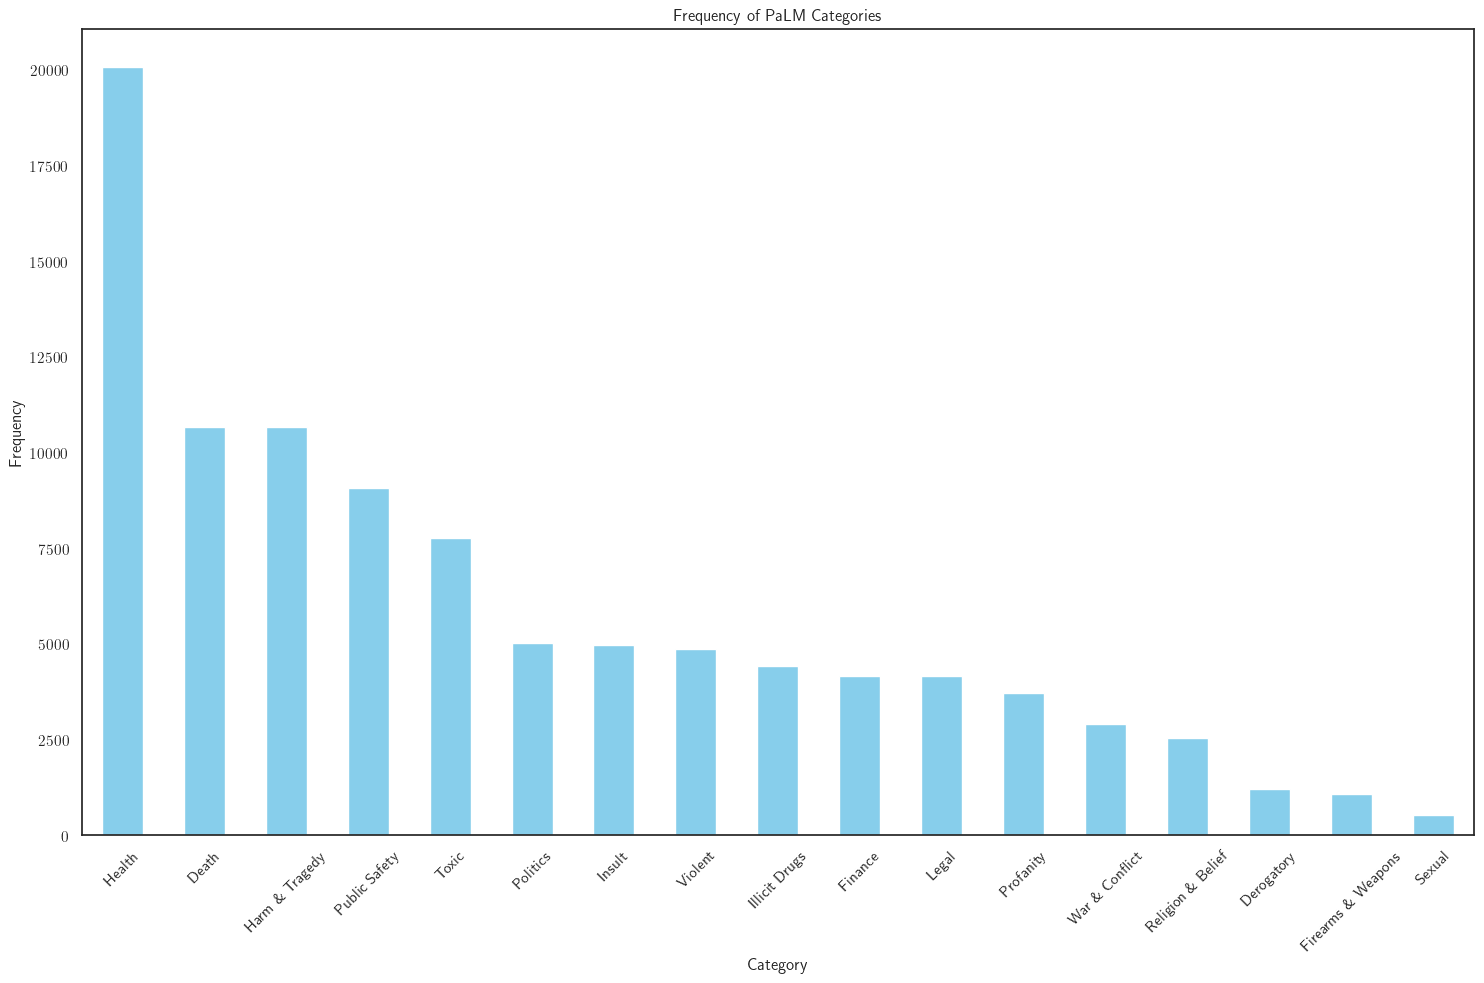

In [104]:
import pandas as pd
import matplotlib.pyplot as plt


# Split categories and stack them
s = F3_Consistency['PaLM_categories'].str.split(', ').apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)

# Replace & with its LaTeX representation
s = s.str.replace('&', r'\&')

# Continue with counting and plotting as before
category_counts = s.value_counts()

# Plot
plt.figure(figsize=(15, 10))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of PaLM Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



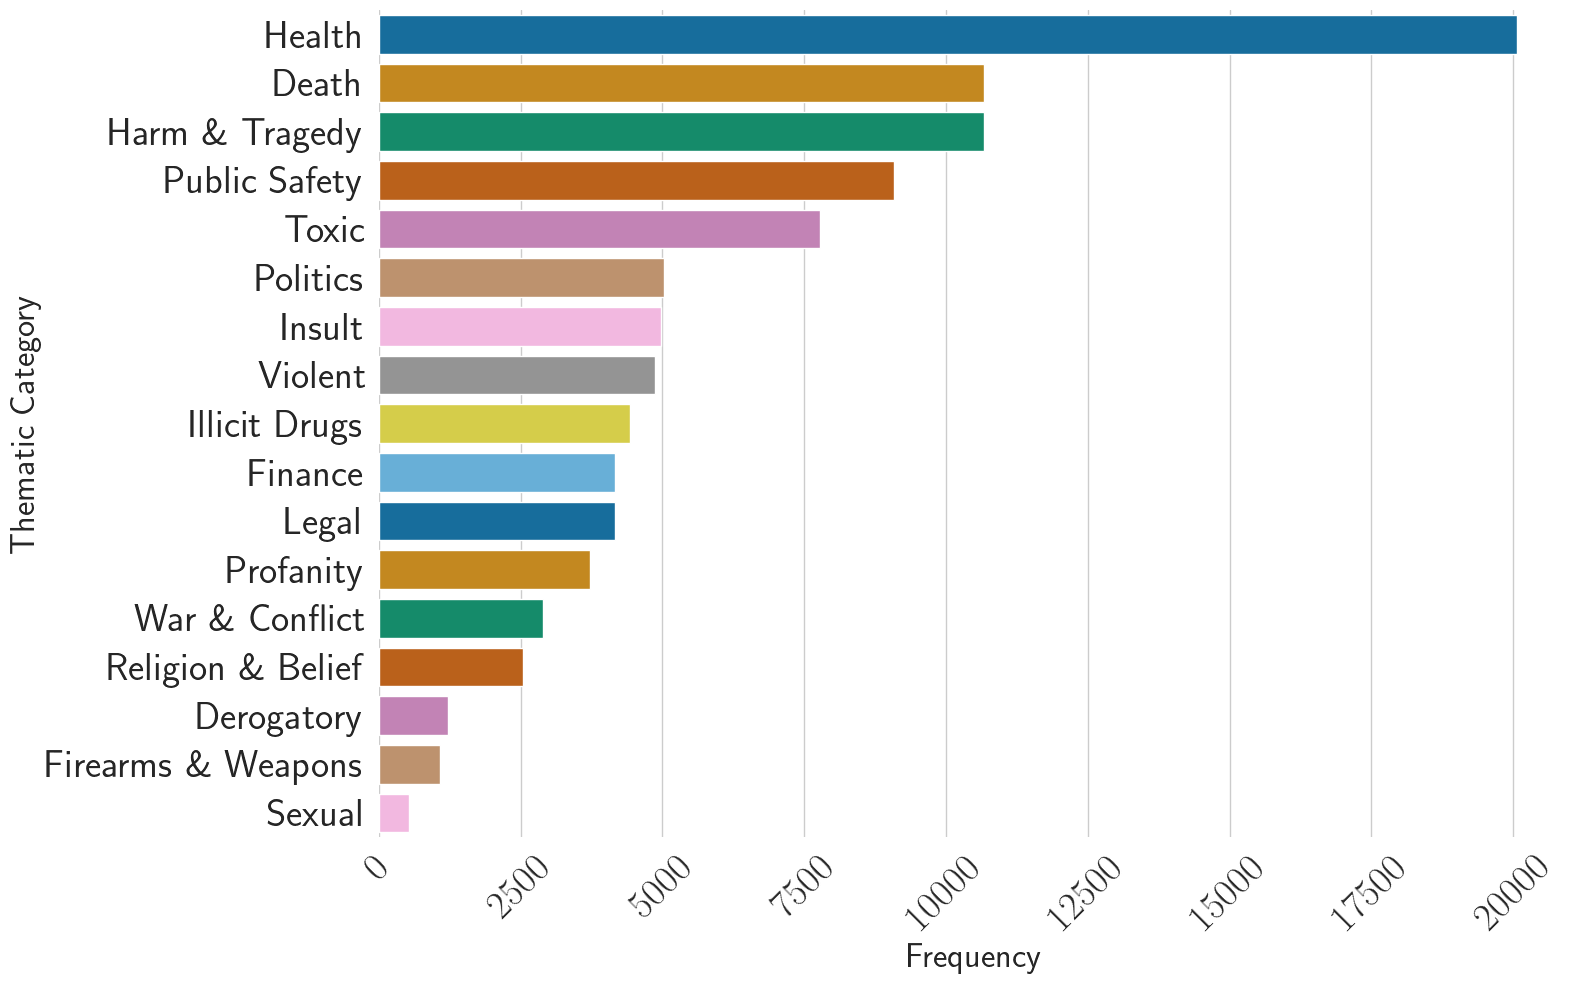

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data extraction (for the context)
s = F3_Consistency['PaLM_categories'].str.split(', ').explode()
s = s.str.replace('&', r'\&')

# Sort categories by frequency
order = s.value_counts().index

# Configure the plotting settings
plt.rc('text', usetex=True)
plt.figure(figsize=(16, 10))
sns.set_style("white")

# Plotting the countplot
ax = sns.countplot(y=s, order=order, palette="colorblind")

# Setting labels, title, and aesthetics
ax.set_xlabel('Frequency', fontsize=20)
ax.set_ylabel('PaLM Category', fontsize=20)
ax.tick_params(axis='both', labelsize=20)

# Add vertical grid lines
ax.xaxis.grid(True)  # <-- This is the line that adds the grid

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Set the rotation of the x-axis tick labels
plt.xticks(rotation=45, fontsize=28)  # Change rotation to 45 degrees for inclination
plt.yticks(fontsize=28)
plt.xlabel('Frequency', fontsize=25)
plt.ylabel('Thematic Category', fontsize=25)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


## In distribution (Pre GPT)

In [106]:
Experiment_Data = Experiment_Data[['uuid','ai_content', 'human_content', 'aigenerated_content_cleaned','ai_generated_label','Prompt_type','pre_post_GPT', 'article_type', 'dataset_source']]

Experiment_Data

,uuid,ai_content,human_content,aigenerated_content_cleaned,ai_generated_label,Prompt_type,pre_post_GPT,article_type,dataset_source
0,4ac69fef-1574-4a5e-8e85-dccdf2b56f69,🚨BREAKING🚨 Blake Masters just declared his sup...,"Blake Masters: ""Of course, I support Lindsey G...",blake masters just declared his support for l...,fake,minor,pre-GPT,twitter post,x-Gen
1,346688be-2b10-403d-a8ae-5fe9faed3214,BREAKING: Texas Governor announces new law to ...,“The Supreme Court has given us an opportunity...,texas governor announces new law to completel...,fake,minor,pre-GPT,twitter post,x-Gen
2,8b95e37b-7396-4759-a828-1e128fa59471,"🚨BREAKING NEWS🚨 Justices Gorsuch, Kavanaugh, a...",Thinking about the many times Justices Gorsuch...,news justices gorsuch kavanaugh and barrett w...,fake,minor,pre-GPT,twitter post,x-Gen
3,65c82312-0872-4b66-9249-2accfe1abb44,🚨🚨BREAKING🚨🚨 Supreme Court Justice leaks opini...,"""There has never been a leak of a vote, much l...",supreme court justice leaks opinion on landma...,fake,minor,pre-GPT,twitter post,x-Gen
4,52c4c17f-5b18-4152-a5e4-647c239bd604,BREAKING: NRA's latest marketing video draws c...,If ISIS made a video as threatening as the NRA...,nras latest marketing video draws comparisons...,fake,minor,pre-GPT,twitter post,x-Gen
...,...,...,...,...,...,...,...,...,...
27662,f10c5702-98ae-44e9-928b-34d5a58713f3,Summary: IRS will not target small businesses ...,“WV families making less than $400K & small bu...,summary irs will not target small businesses a...,real,critical,post-GPT,twitter post,x-Gen
27663,308c43e4-5c35-48d6-b2d7-e1b393379d8c,Summary: Voter ID laws have been implemented i...,"In Iowa, “since we have put a number of the vo...",summary voter id laws have been implemented in...,real,critical,post-GPT,twitter post,x-Gen
27664,51cee66a-9dec-4fb8-9ab1-9eaea7f8b39a,Summary: Wisconsin offers free healthcare with...,"In Wisconsin, even multimillionaires can be on...",summary wisconsin offers free healthcare witho...,real,critical,post-GPT,twitter post,x-Gen
27665,f034cfc2-9f2b-414c-b59a-002182baf7fa,Rubio and DeSantis opposed Hurricane Sandy rel...,Sen. Marco Rubio and U.S. Rep. Ron DeSantis “v...,rubio and desantis opposed hurricane sandy rel...,real,critical,post-GPT,twitter post,x-Gen


## LLM-Train Tran-Test-Val Split

In [107]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Filter the relevant columns
Experiment_Data = Experiment_Data[['uuid','ai_content', 'human_content', 'aigenerated_content_cleaned',
                                  'ai_generated_label','Prompt_type','pre_post_GPT', 'article_type', 'dataset_source']]

# Step 2: Create main folder
main_folder = "Experiment Data"
if not os.path.exists(main_folder):
    os.mkdir(main_folder)

# Step 3: Split the data based on `pre_post_GPT`
pre_GPT_data = Experiment_Data[Experiment_Data['pre_post_GPT'] == "pre-GPT"]
post_GPT_data = Experiment_Data[Experiment_Data['pre_post_GPT'] == "post-GPT"]

for data, folder_name in [(pre_GPT_data, "pre-GPT"), (post_GPT_data, "post-GPT")]:
    folder_path = os.path.join(main_folder, folder_name)

    if not os.path.exists(folder_path):
        os.mkdir(folder_path)

    # Step 4: Split data based on unique categories
    for _, category in enumerate(['Prompt_type', 'article_type', 'dataset_source']):
        unique_values = data[category].unique()

        for value in unique_values:
            sub_data = data[data[category] == value]

            # Define sub-folder for this unique value
            sub_folder_path = os.path.join(folder_path, category, value)
            if not os.path.exists(sub_folder_path):
                os.makedirs(sub_folder_path)  # using makedirs to create intermediate category folders

            # Only split "pre-GPT" data into train/validation/test
            if folder_name == "pre-GPT":
                # Step 5: Stratified split based on `ai_generated_label`
                train_data, temp_data = train_test_split(sub_data, test_size=0.3, stratify=sub_data['ai_generated_label'], random_state=42)
                val_data, test_data = train_test_split(temp_data, test_size=1/3, stratify=temp_data['ai_generated_label'], random_state=42)

                train_data.to_csv(os.path.join(sub_folder_path, "train.csv"), index=False)
                val_data.to_csv(os.path.join(sub_folder_path, "validation.csv"), index=False)
                test_data.to_csv(os.path.join(sub_folder_path, "test.csv"), index=False)
            else:
                sub_data.to_csv(os.path.join(sub_folder_path, "data.csv"), index=False)


## Human Train test split

In [108]:
%cd /content/drive/MyDrive/F3/
%ls

/content/drive/.shortcut-targets-by-id/1-q8PQLnrlI1K9omfwKeaKGhV2ToETrvd/Xgen/FakeNewsDetection/DevData/Ai-Gen - Completed Data/Experiment Data/Full_Dataset/5. F3_Dataset
 AlignScore-large.ckpt                      F3_Dataset_visualization_plot
 AlignScore-large.ckpt.1                   'F3_Experiment Data'/
 DeBerta_v3NLI.ckpt                         F3_Human_Dataset.csv
'Experiment Data'/                          F3_Llama_2.csv
 F3_Consistency.csv                         F3_Llama_2_NER.csv
 F3_Dataset_PaLM2.csv                       F3_Llama_2_NER_DICT.csv
 F3_Dataset_Sanity.csv                      llama2_backup/
 F3_Dataset_Updated_AlignScore.csv          llama2_backup2/
 F3_Dataset_Updated.csv                     textbisson_backup/
 F3_Dataset_Updated_Semantic_Distance.csv   textbisson_backup2/
 F3_Dataset_Updated_Sentiment.csv           Untitled0.ipynb


In [109]:
F3_Human_Data = pd.read_csv('F3_Human_Dataset.csv', encoding='utf-8')
F3_Human_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12723 entries, 0 to 12722
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   uuid            12723 non-null  object
 1   content         12723 non-null  object
 2   label           12723 non-null  object
 3   article_type    12723 non-null  object
 4   source_type     12723 non-null  object
 5   pre_post_GPT    12723 non-null  object
 6   dataset_source  12723 non-null  object
 7   text_length     12723 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 795.3+ KB


In [110]:
# Replace values in dataset_source column
F3_Human_Data['dataset_source'] = F3_Human_Data['dataset_source'].replace({
    'FakeNewsNet_Gossipcop': 'FakeNewsNet',
    'FakeNewsNet_Politifacts': 'FakeNewsNet',
    'X-Gen': 'FIKE'
})

In [111]:
 #Group and describe data
grouped_data = F3_Human_Data.groupby(['pre_post_GPT', 'dataset_source', 'article_type', 'label']).describe()


In [112]:
grouped_data

text_length              \
                                                     count        mean   
pre_post_GPT dataset_source article_type label                           
post-GPT     x-Gen          news article fake        179.0  842.832402   
                                         real        151.0  744.086093   
                            twitter post fake       1615.0   20.900929   
                                         real        678.0   24.025074   
pre-GPT      CoAID          news article fake        154.0   85.207792   
                                         real       2649.0   82.167988   
                            twitter post fake        871.0   39.388060   
                                         real       1337.0   38.926702   
             FakeNewsNet    news article fake       1625.0  608.154462   
                                         real       2457.0  614.302808   
             x-Gen          twitter post fake        653.0   39.482389   
                                         real        354.0   38.627119   

                                                                          \
                                                       std    min    25%   
pre_post_GPT dataset_source article_type label                             
post-GPT     x-Gen          news article fake   448.120588  164.0  509.0   
                                         real   359.745928  175.0  493.0   
                            twitter post fake     9.728538    4.0   14.0   
                                         real     9.856172    8.0   17.0   
pre-GPT      CoAID          news article fake     8.503498   52.0   81.0   
                                         real     7.204350   51.0   78.0   
                            twitter post fake    15.362622    8.0   26.0   
                                         real    15.836430    7.0   25.0   
             FakeNewsNet    news article fake   331.747289  252.0  384.0   
                                         real   349.980998  251.0  372.0   
             x-Gen          twitter post fake    15.355653   10.0   26.0   
                                         real    14.427388   10.0   26.0   

                                                                       
                                                  50%     75%     max  
pre_post_GPT dataset_source article_type label                         
post-GPT     x-Gen          news article fake   731.0  1146.5  1958.0  
                                         real   666.0   935.5  1983.0  
                            twitter post fake    19.0    25.0    75.0  
                                         real    22.0    29.0    72.0  
pre-GPT      CoAID          news article fake    85.5    90.0   106.0  
                                         real    83.0    87.0   105.0  
                            twitter post fake    39.0    52.0    88.0  
                                         real    40.0    52.0    92.0  
             FakeNewsNet    news article fake   499.0   713.0  1995.0  
                                         real   500.0   724.0  1985.0  
             x-Gen          twitter post fake    38.0    53.0    79.0  
                                         real    36.0    52.0    75.0

In [113]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming F3_Human_Data is already loaded
Experiment_Data = F3_Human_Data

# Step 1: Create main folder
main_folder = "Experiment Data"
if not os.path.exists(main_folder):
    os.mkdir(main_folder)

# Step 2: Split the data based on `pre_post_GPT`
pre_GPT_data = Experiment_Data[Experiment_Data['pre_post_GPT'] == "pre-GPT"]
post_GPT_data = Experiment_Data[Experiment_Data['pre_post_GPT'] == "post-GPT"]

for data, folder_name in [(pre_GPT_data, "pre-GPT"), (post_GPT_data, "post-GPT")]:
    folder_path = os.path.join(main_folder, folder_name)

    if not os.path.exists(folder_path):
        os.mkdir(folder_path)

    # Step 3: Split data based on unique categories
    for _, category in enumerate(['article_type', 'dataset_source']):  # Excluded 'Prompt_type'
        unique_values = data[category].unique()

        for value in unique_values:
            sub_data = data[data[category] == value]

            # Define sub-folder for this unique value
            sub_folder_path = os.path.join(folder_path, category, value)
            if not os.path.exists(sub_folder_path):
                os.makedirs(sub_folder_path)  # using makedirs to create intermediate category folders

            # Only split "pre-GPT" data into train/validation/test
            if folder_name == "pre-GPT":
                # Step 4: Stratified split based on `ai_generated_label`
                train_data, temp_data = train_test_split(sub_data, test_size=0.3, stratify=sub_data['label'], random_state=42)
                val_data, test_data = train_test_split(temp_data, test_size=1/3, stratify=temp_data['label'], random_state=42)

                train_data.to_csv(os.path.join(sub_folder_path, "train.csv"), index=False)
                val_data.to_csv(os.path.join(sub_folder_path, "validation.csv"), index=False)
                test_data.to_csv(os.path.join(sub_folder_path, "test.csv"), index=False)
            else:
                sub_data.to_csv(os.path.join(sub_folder_path, "data.csv"), index=False)
